In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv'
data=pd.read_csv(path)

<ipython-input-4-931ca20ed92f>:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path)


In [ ]:
data

Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
0         2693.0000            22  4.391057  4.617262  0.162691 -0.029585   
1         3736.0000            35  4.340481  4.816692  0.701348 -0.038280   
2         7015.0000            32  3.838727  4.386369  0.603568 -0.032216   
3         7099.0000            29  4.255805  4.830048  0.433747 -0.027611   
4         7700.0000            25  3.976909  4.506433 -0.008809 -0.030297   
...             ...           ...       ...       ...       ...       ...   
265621  707917.4375            60  6.733888  7.179924  1.901087 -0.054719   
265622  707951.4375            41  6.826629  7.133022  1.474081 -0.019174   
265623  708145.4375            45  6.787791  7.154027  0.116755 -0.056213   
265624  708398.4375            41  6.889866  7.141219  0.684921 -0.006264   
265625  708585.4375            39  6.865218  7.144353  0.288761 -0.011310   

            CD19      CD22     CD11b       CD4  ...     CD117     CD49d  \
0      -0.006696  0.066388 -0.009184  0.363602  ...  0.053050  0.853505   
1      -0.016654  0.074409  0.808031 -0.035424  ...  0.089660  0.197818   
2       0.073855 -0.042977 -0.001881 -0.008781  ...  0.046222  2.586670   
3      -0.017661 -0.044072  0.733698 -0.019066  ...  0.066470  1.338669   
4       0.080423  0.495791  1.107627  0.552746  ... -0.006223  0.180924   
...          ...       ...       ...       ...  ...       ...       ...   
265621  3.127012  2.389596  0.212047  0.003287  ... -0.043032  0.069388   
265622 -0.055620 -0.007261  0.063395  0.145304  ... -0.011105  0.533736   
265623 -0.008864 -0.035158 -0.041845  0.970120  ...  0.143869  1.269464   
265624 -0.026111 -0.030837 -0.034641  1.597189  ...  0.087102 -0.055912   
265625 -0.048786  0.073983 -0.031787  0.078800  ... -0.047971  0.101955   

          HLA-DR      CD64      CD41   Viability   file_number   event_number  \
0       1.664480 -0.005376 -0.001961    0.648429      3.627711            307   
1       0.491592  0.144814  0.868014    0.561384      3.627711            545   
2       1.308337 -0.010961 -0.010413    0.643337      3.627711           1726   
3       0.140523 -0.013449 -0.026039   -0.026523      3.627711           1766   
4       0.197332  0.076167 -0.040488    0.283287      3.627711           2031   
...          ...       ...       ...         ...           ...            ...   
265621  3.550516  0.147588 -0.043806    0.144479      3.669327         102685   
265622  0.123758 -0.042495 -0.027971    0.236957      3.669327         102686   
265623  0.047215 -0.008000 -0.025811   -0.003500      3.669327         102690   
265624  0.501536  0.053884 -0.042602    0.107206      3.669327         102701   
265625  6.200001  0.296877  0.192786    0.620872      3.669327         102706   

         label   individual  
0            1            1  
1            1            1  
2            1            1  
3            1            1  
4            1            1  
...        ...          ...  
265621     NaN            2  
265622     NaN            2  
265623     NaN            2  
265624     NaN            2  
265625     NaN            2  

[265626 rows x 41 columns]

In [ ]:
#create a DataFrame
df=pd.DataFrame(data)

In [ ]:
# Clean column names
data.columns = data.columns.str.strip()

# Drop columns if they exist
columns_to_drop = ['Time', 'file_number', 'event_number']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [ ]:
df=df.drop(columns=['Time',' file_number',' event_number'])

In [ ]:
data.columns

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'],
      dtype='object')

In [ ]:
#Information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265626 entries, 0 to 265625
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0    Cell_length  265626 non-null  int64  
 1    DNA1         265626 non-null  float64
 2    DNA2         265626 non-null  float64
 3    CD45RA       265626 non-null  float64
 4    CD133        265626 non-null  float64
 5    CD19         265626 non-null  float64
 6    CD22         265626 non-null  float64
 7    CD11b        265626 non-null  float64
 8    CD4          265626 non-null  float64
 9    CD8          265626 non-null  float64
 10   CD34         265626 non-null  float64
 11   Flt3         265626 non-null  float64
 12   CD20         265626 non-null  float64
 13   CXCR4        265626 non-null  float64
 14   CD235ab      265626 non-null  float64
 15   CD45         265626 non-null  float64
 16   CD123        265626 non-null  float64
 17   CD321        265626 non-null  float64
 18   CD1

<ipython-input-11-1972a42c756f>:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv', na_values=['NA', 'N/A', '', 'unknown', ' '])


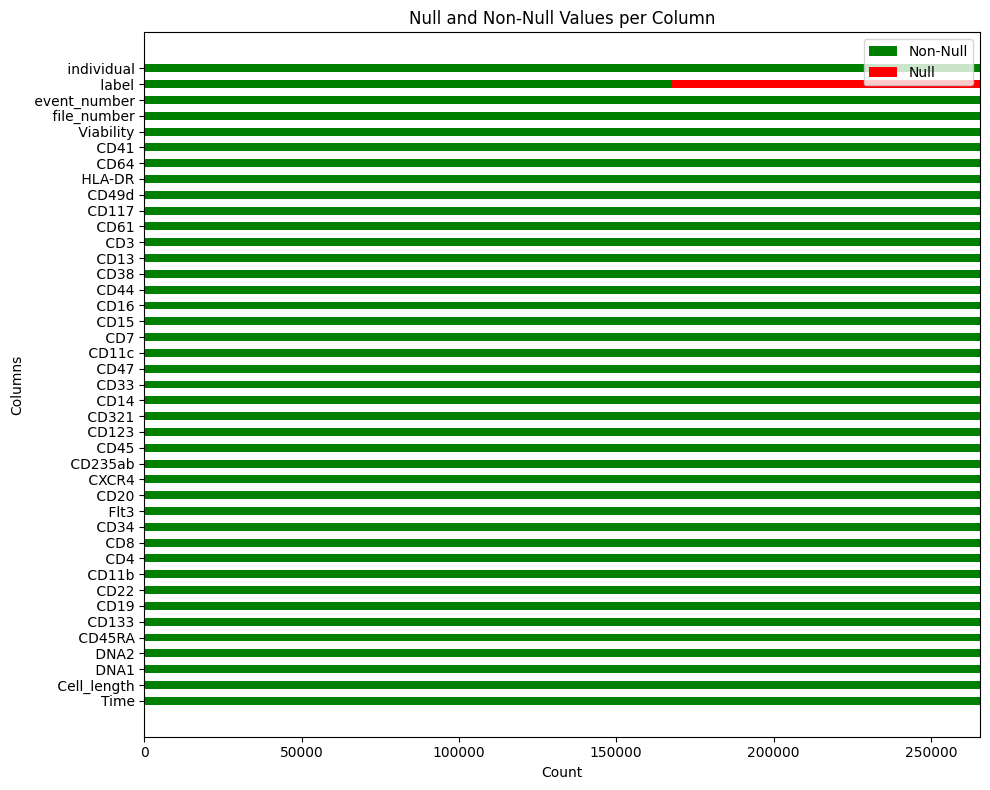

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (already with NaN values identified)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv', na_values=['NA', 'N/A', '', 'unknown', ' '])

# Strip any leading/trailing whitespaces in the entire DataFrame
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Calculate the number of null and non-null values per column
null_values_sum = df.isnull().sum()
nonnull_values_sum = df.notnull().sum()

# Create indices for the columns
indices = np.arange(len(df.columns))

# Set the height of bars (which controls width in horizontal bar charts)
bar_height = 0.5  # Changed from bar_width to bar_height

# Increase figure size for better readability
plt.figure(figsize=(10, 8))  # You can adjust the figure size

# Plot stacked bars for null and non-null values
plt.barh(indices, nonnull_values_sum, height=bar_height, color='green', label='Non-Null')
plt.barh(indices, null_values_sum, height=bar_height, left=nonnull_values_sum, color='red', label='Null')

# Add labels, title, and legend
plt.xlabel('Count')
plt.ylabel('Columns')
plt.title('Null and Non-Null Values per Column')

# Reduce the rotation angle for readability and adjust alignment
plt.yticks(indices, df.columns, fontsize=10)  # You can reduce or increase fontsize as needed

plt.legend()

# Display the plot with tight layout to avoid overlapping
plt.tight_layout()
plt.show()


In [ ]:
# Display the range (min, max) for each numerical feature
feature_ranges = df.describe().loc[['min', 'max']]
print(feature_ranges)

            Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
min       1.0000          10.0  2.786488  2.236450 -0.057305 -0.058081   
max  708585.4375          65.0  7.001489  7.472308  6.691197  5.527494   

         CD19      CD22     CD11b       CD4  ...      CD61     CD117  \
min -0.058089 -0.057342 -0.058236 -0.057751  ... -0.057642 -0.057668   
max  4.990085  5.160477  5.260789  6.581762  ...  7.748497  5.502125   

        CD49d    HLA-DR      CD64      CD41   Viability   file_number  \
min -0.058064 -0.057974 -0.058199 -0.058244   -0.057979      3.627711   
max  5.153438  7.052507  4.517843  7.718288    2.433031      3.669327   

      event_number   individual  
min            1.0          1.0  
max       400112.0          2.0  

[2 rows x 40 columns]


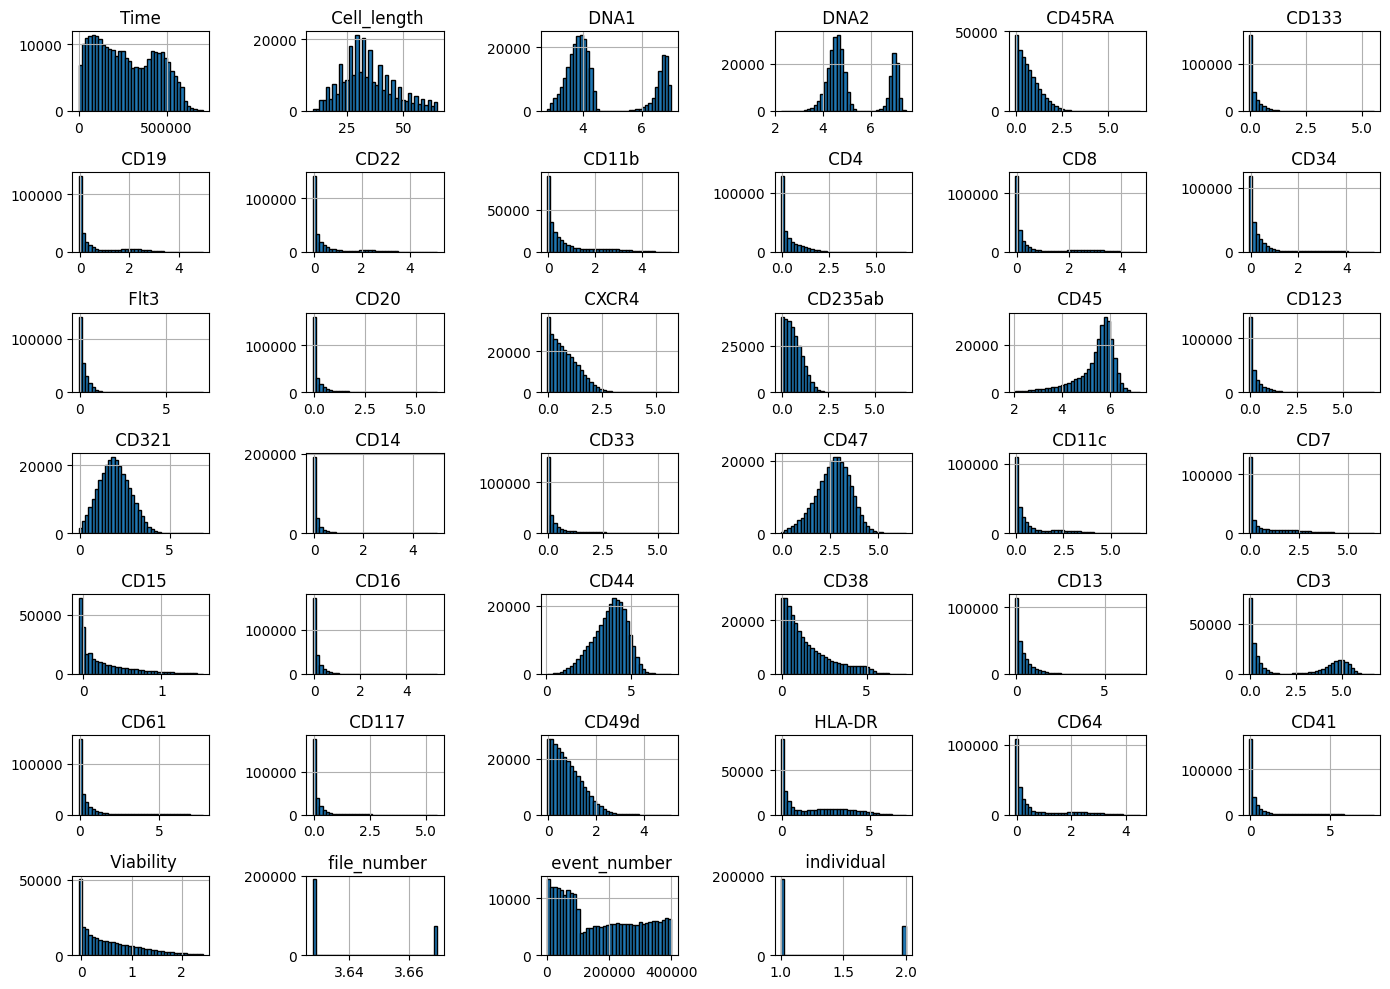

In [ ]:
# Plot histograms for all numerical columns
df.hist(figsize=(14, 10), bins=38, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
print([col for col in df.columns])


['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19', ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4', ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47', ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3', ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability', ' file_number', ' event_number', ' label', ' individual']


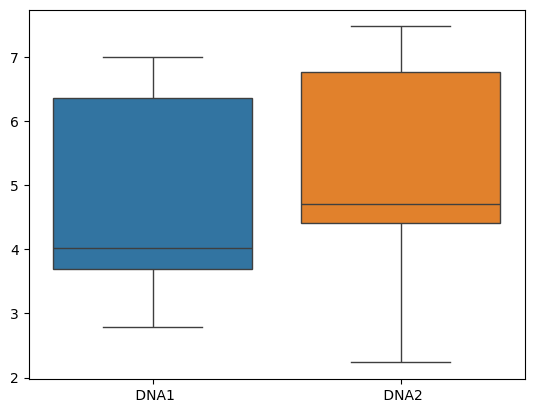

In [ ]:
sns.boxplot(data=df[[' DNA1', ' DNA2']])
plt.show()


Unique values in 'label' before filtering:
[nan '10' '11' '12' '13' '14']
Unique values in 'label' after filtering:
['10' '11' '12' '13' '14']


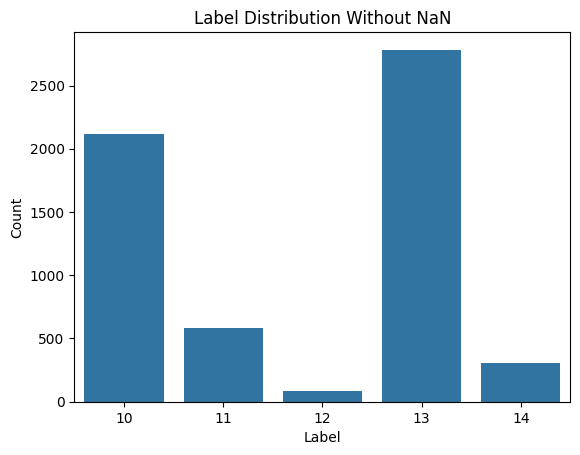

In [ ]:
# Replace both whitespace-only strings and 'NaN' string with actual np.nan
df[' label'] = df[' label'].replace(['', ' ', 'NaN'], np.nan)

# Verify the unique values in the 'label' column before filtering (to debug if any NaN-like values remain)
print("Unique values in 'label' before filtering:")
print(df[' label'].unique())

# Drop rows where 'label' is NaN
df_filtered = df.dropna(subset=[' label'])

# Verify the unique values in 'label' after filtering
print("Unique values in 'label' after filtering:")
print(df_filtered[' label'].unique())

# Plot the label distribution after removing NaN values
sns.countplot(data=df_filtered, x=' label')
plt.title('Label Distribution Without NaN')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


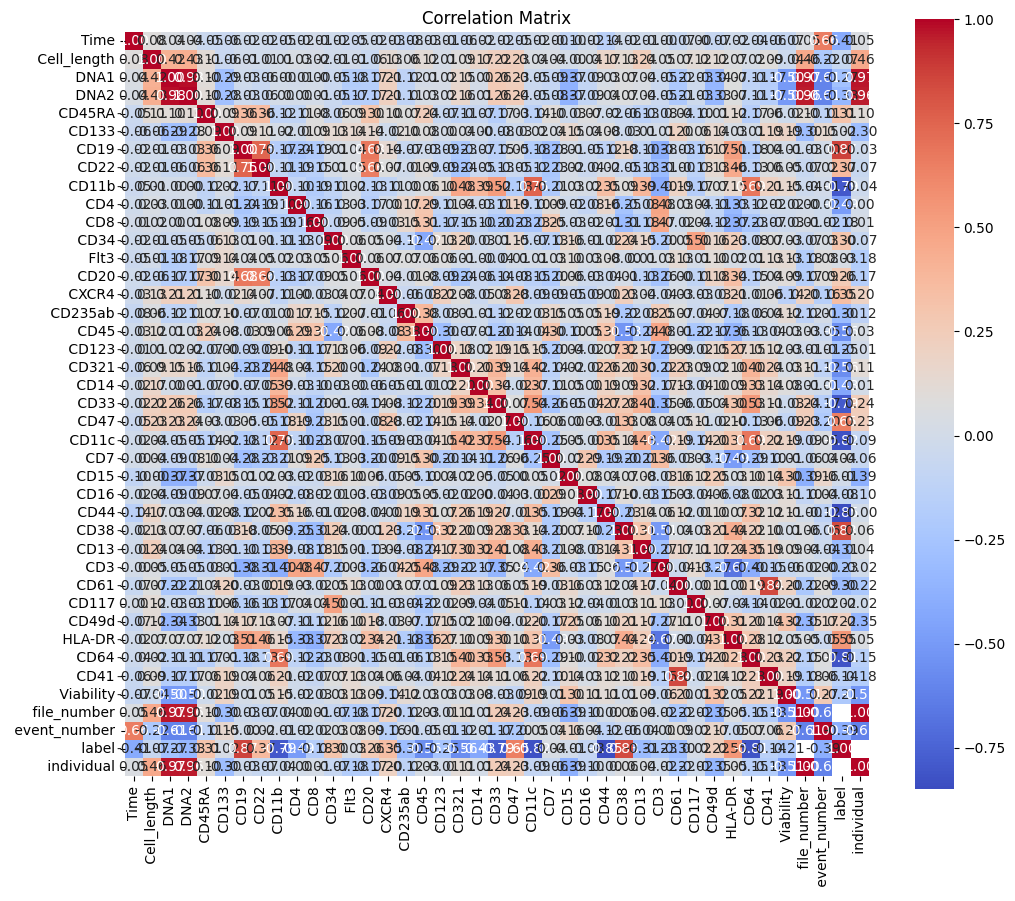

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Ensure column names are stripped of extra spaces
df.columns = df.columns.str.strip()

# Define the columns to remove
columns_to_remove = ['Viability', 'file_number', 'event_number']

# Keep only the columns that exist in the DataFrame
columns_to_remove = [col for col in columns_to_remove if col in df.columns]

# Drop the specified columns if they exist
df.drop(columns=columns_to_remove, inplace=True)

# Display the updated DataFrame
print("Updated DataFrame:")
print(df.head())


Updated DataFrame:
     Time  Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0  2693.0           22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1  3736.0           35  4.340481  4.816692  0.701348 -0.038280 -0.016654   
2  7015.0           32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3  7099.0           29  4.255805  4.830048  0.433747 -0.027611 -0.017661   
4  7700.0           25  3.976909  4.506433 -0.008809 -0.030297  0.080423   

       CD22     CD11b       CD4  ...      CD13       CD3      CD61     CD117  \
0  0.066388 -0.009184  0.363602  ...  0.038552 -0.032596 -0.002936  0.053050   
1  0.074409  0.808031 -0.035424  ...  1.457326 -0.043466  1.258437  0.089660   
2 -0.042977 -0.001881 -0.008781  ...  0.213583  0.320792  0.257137  0.046222   
3 -0.044072  0.733698 -0.019066  ...  0.514349  0.060443 -0.041140  0.066470   
4  0.495791  1.107627  0.552746  ...  0.585712  0.137186  0.168609 -0.006223   

      CD49d    HLA-DR      CD64      CD41  

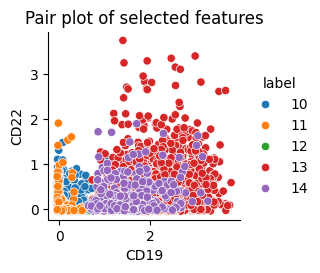

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='label',x_vars=['CD19'],y_vars=['CD22'])
plt.title('Pair plot of selected features')
plt.show()

In [ ]:
print(df.columns.tolist())


['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64', 'CD41', 'label', 'individual']


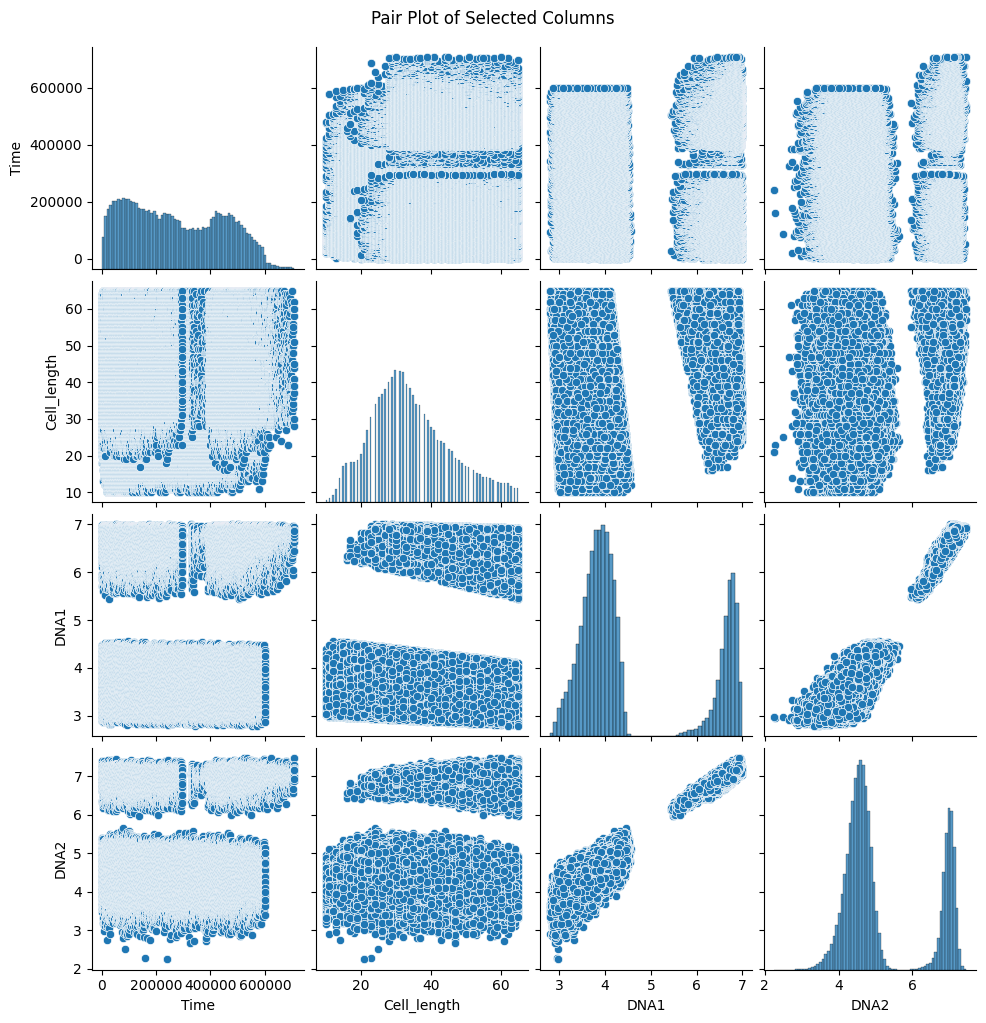

In [ ]:
df.columns = df.columns.str.strip()

# Specify the columns for the pair plot
pairplot_columns = ['Time', 'Cell_length', 'DNA1', 'DNA2']

# Check if the specified columns are present in the DataFrame
available_columns = [col for col in pairplot_columns if col in df.columns]
missing_columns = [col for col in pairplot_columns if col not in df.columns]

if missing_columns:
    print(f"Warning: The following columns are missing and will be excluded: {missing_columns}")

# Proceed only if there are valid columns available for the plot
if available_columns:
    # Create a pair plot for the specified columns
    sns.pairplot(df[available_columns])
    plt.suptitle('Pair Plot of Selected Columns', y=1.02)
    plt.show()

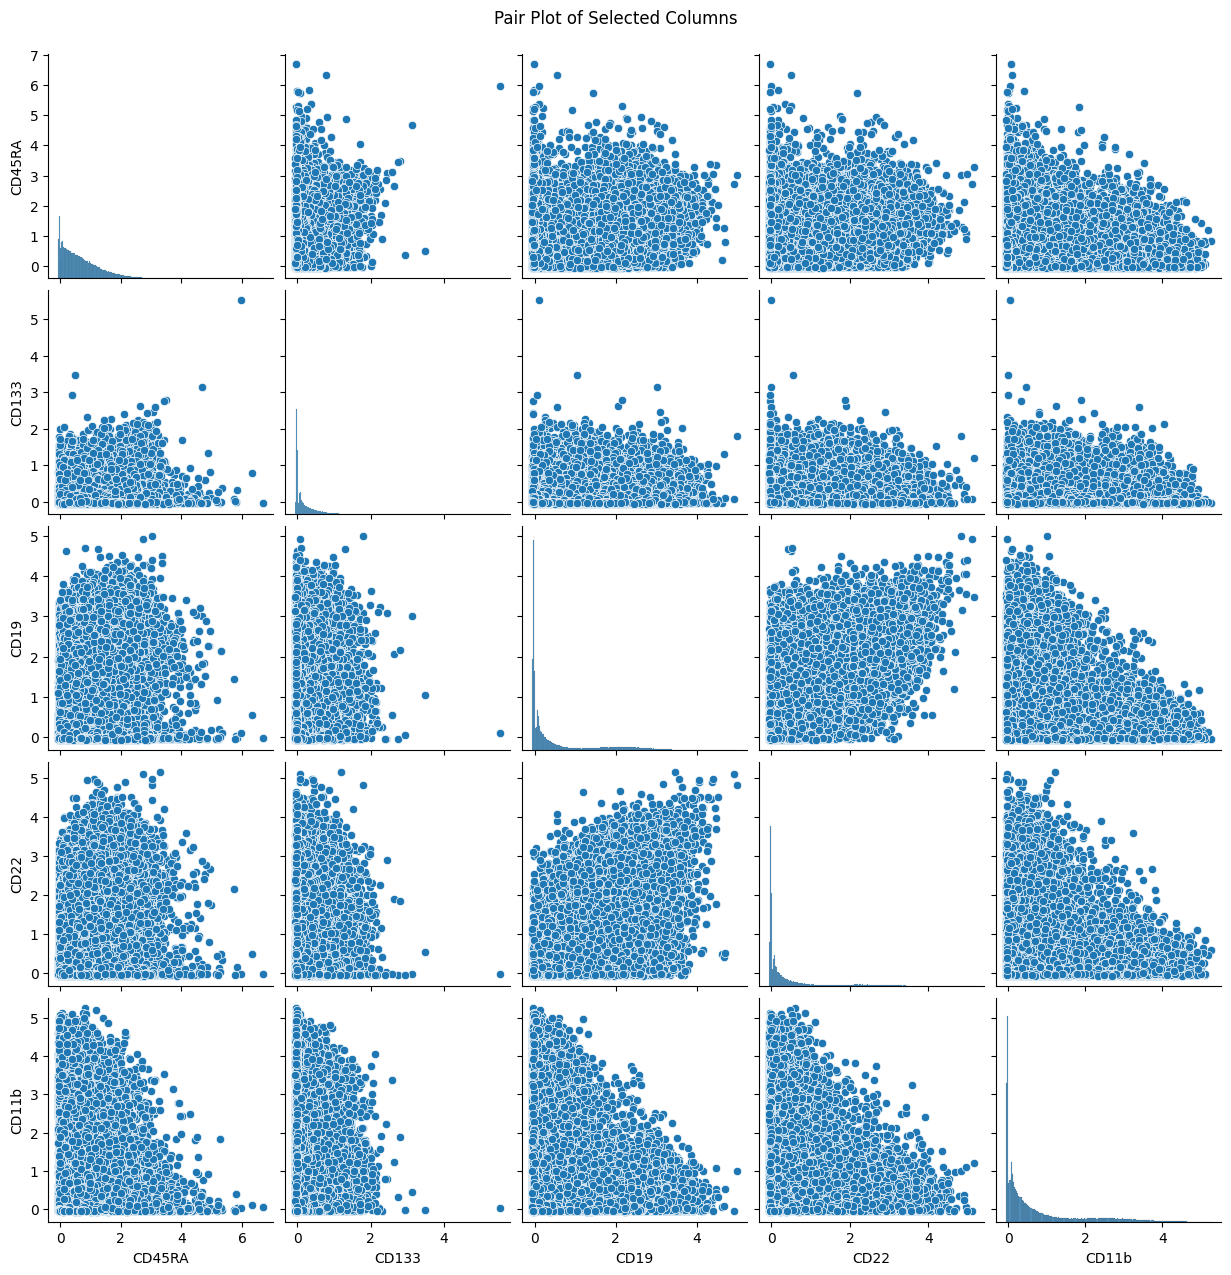

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns for the pair plot
pairplot_columns = [
     'CD45RA', 'CD133',
    'CD19', 'CD22', 'CD11b',
]

# Create a pair plot for the specified columns
sns.pairplot(df[pairplot_columns])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


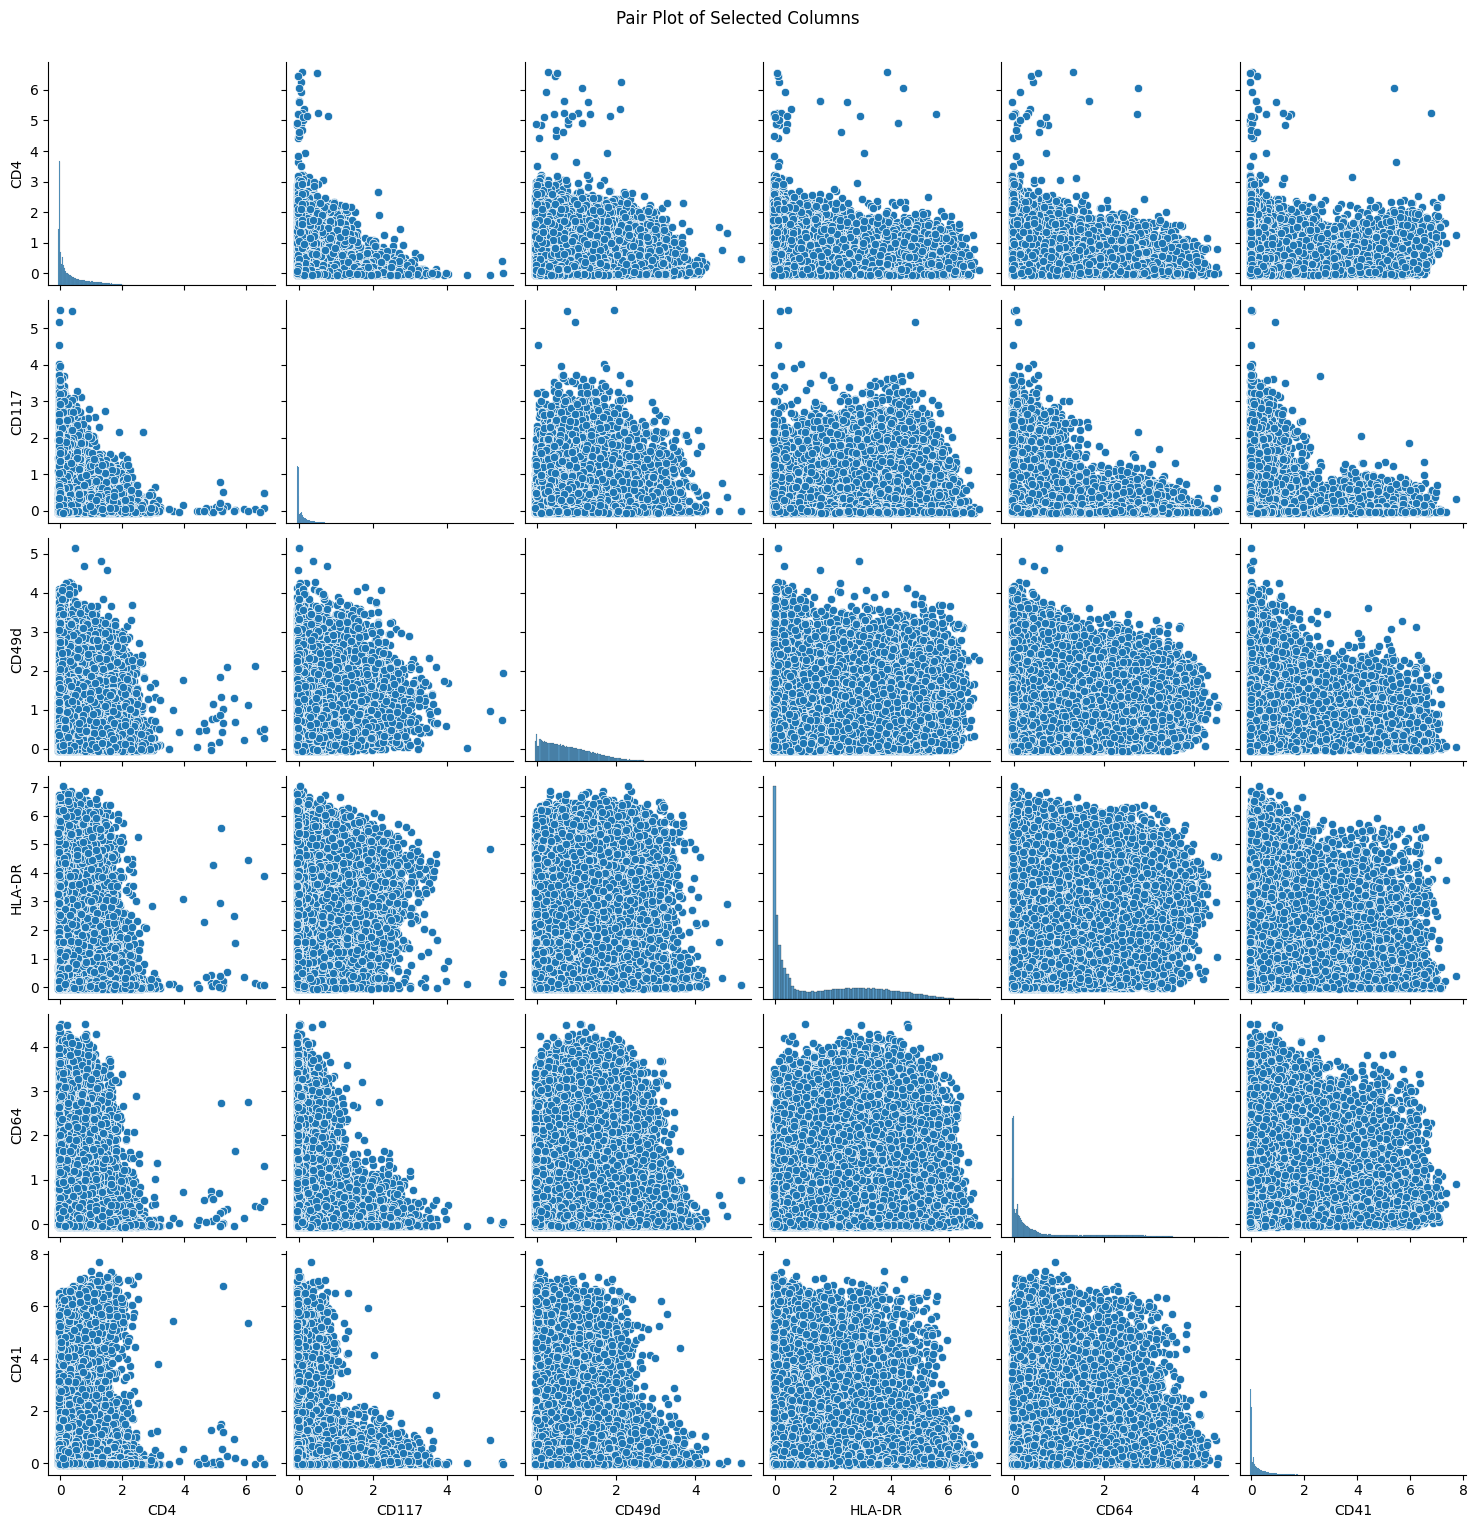

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns for the pair plot
pairplot_columns = [
     'CD4', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41'
]

# Create a pair plot for the specified columns
sns.pairplot(df[pairplot_columns])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


(0.0, 6.0)

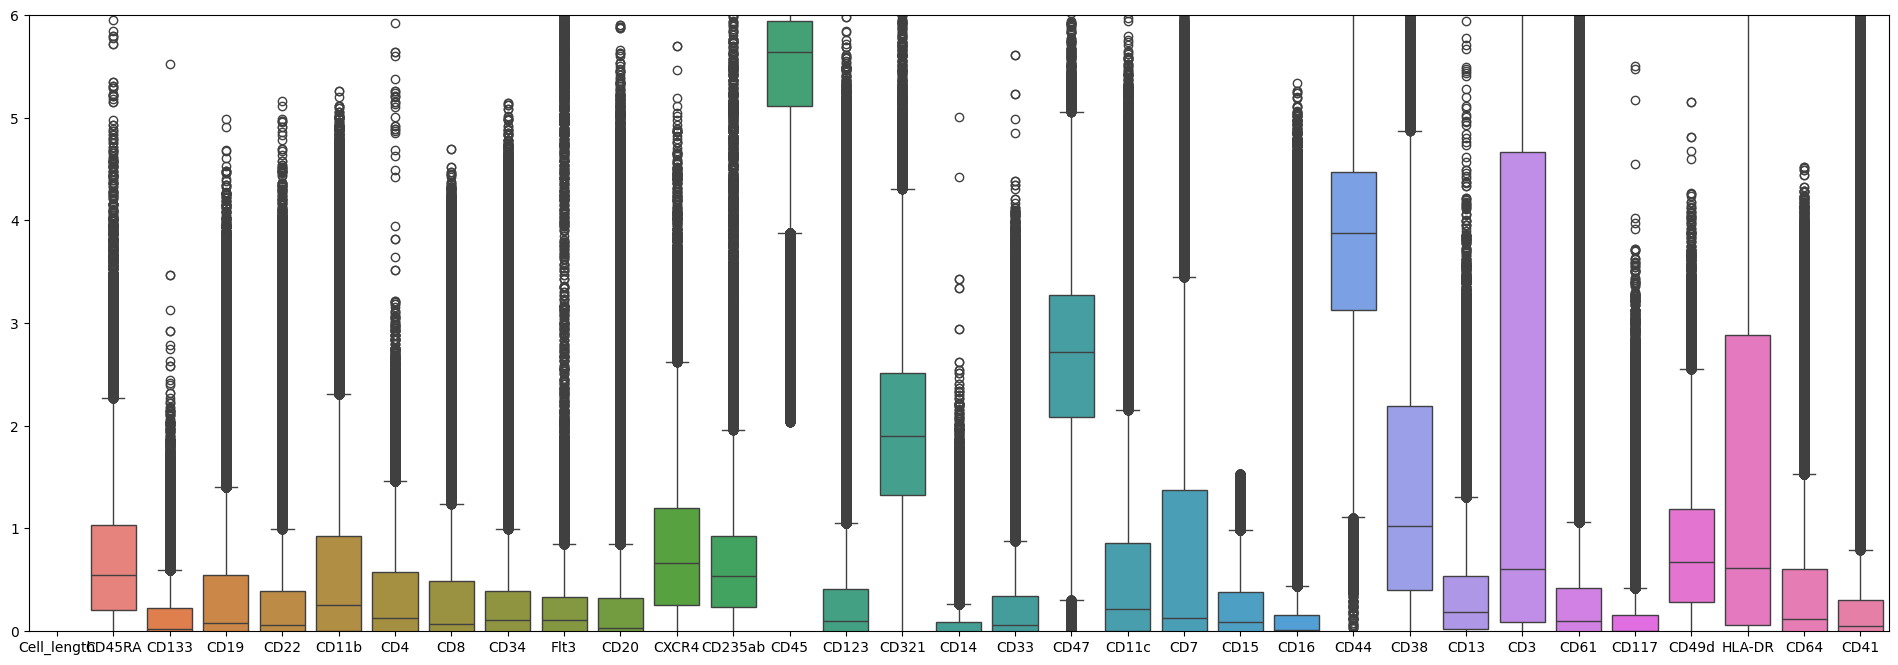

In [ ]:

#box plot
fig, ax = plt.subplots(figsize=(24, 8))
sns.boxplot(data=df[['Cell_length','CD45RA','CD133','CD19','CD22','CD11b','CD4','CD8','CD34','Flt3','CD20','CXCR4','CD235ab','CD45','CD123','CD321','CD14','CD33','CD47','CD11c','CD7','CD15','CD16','CD44','CD38','CD13','CD3','CD61','CD117','CD49d','HLA-DR','CD64','CD41']],ax=ax)
ax.set_ylim(0,6)

Skewness values for the selected columns:
Time           0.219930
Cell_length    0.527840
DNA1           0.845028
DNA2           0.779183
CD45RA         1.191596
CD133          2.141960
CD19           1.682613
CD22           2.283187
CD11b          1.679108
CD4            1.622063
CD117          4.097522
CD49d          0.856808
HLA-DR         0.795376
CD64           1.743737
CD41           5.366337
dtype: float64


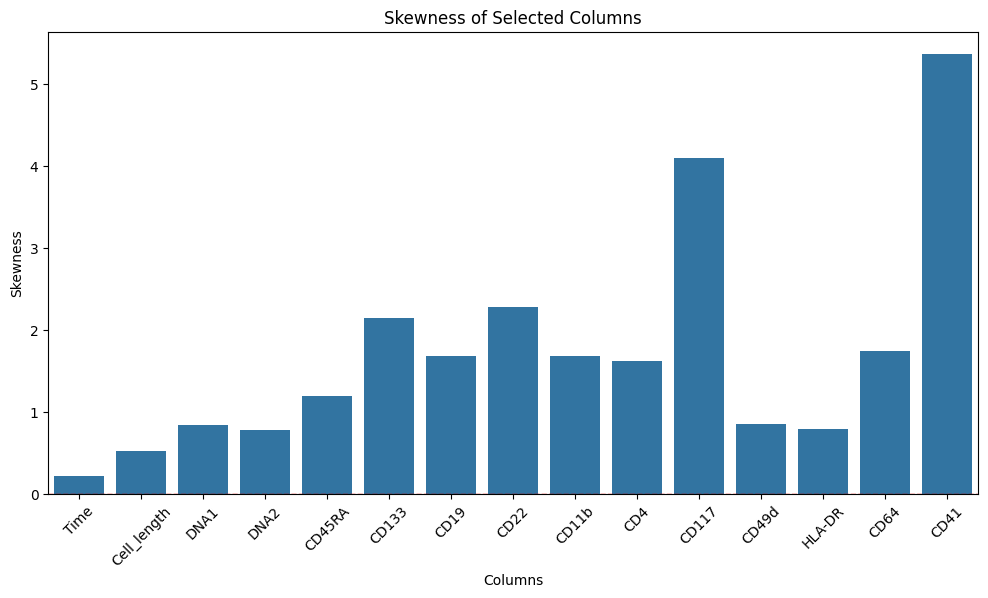

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns for skewness calculation
skewness_columns = [
    'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
    'CD19', 'CD22', 'CD11b', 'CD4', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41'
]

# Calculate skewness for the specified columns
skewness_values = df[skewness_columns].skew()

# Print the skewness values
print("Skewness values for the selected columns:")
print(skewness_values)

# Plot the skewness values as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness_values.index, y=skewness_values.values)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Line at y=0 for reference
plt.title('Skewness of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


Kurtosis values for specified columns:
Time           -1.159846
Cell_length    -0.165947
DNA1           -1.005934
DNA2           -1.024951
CD45RA          1.964313
CD133           6.190169
CD19            1.590919
CD22            4.500297
CD11b           1.964622
CD4             2.844363
CD117          23.375467
CD49d           0.468152
HLA-DR         -0.690042
CD64            1.910668
CD41           38.521744
dtype: float64


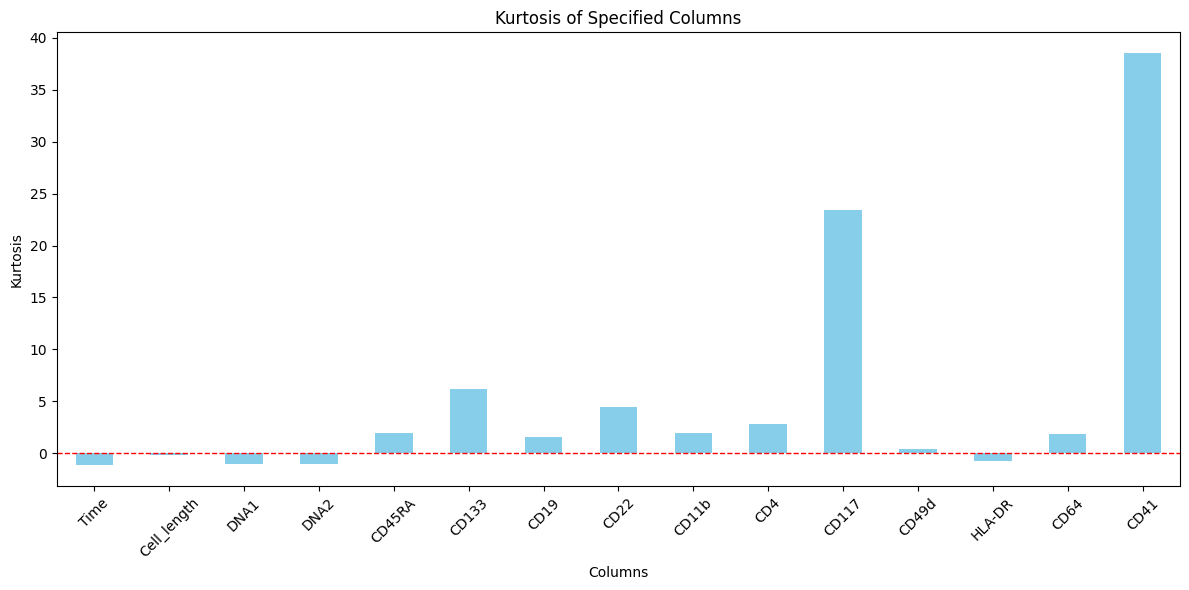

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the specific columns to analyze
specific_columns = [
    'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
    'CD19', 'CD22', 'CD11b', 'CD4', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41'
]

# Filter the DataFrame to include only the specified columns
filtered_df = df[specific_columns]

# Calculate kurtosis for the specific columns
kurtosis_values = filtered_df.kurtosis()

# Display kurtosis values
print("Kurtosis values for specified columns:")
print(kurtosis_values)

# Plot the kurtosis values
plt.figure(figsize=(12, 6))
kurtosis_values.plot(kind='bar', color='skyblue')
plt.title('Kurtosis of Specified Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Line at y=0 for reference
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


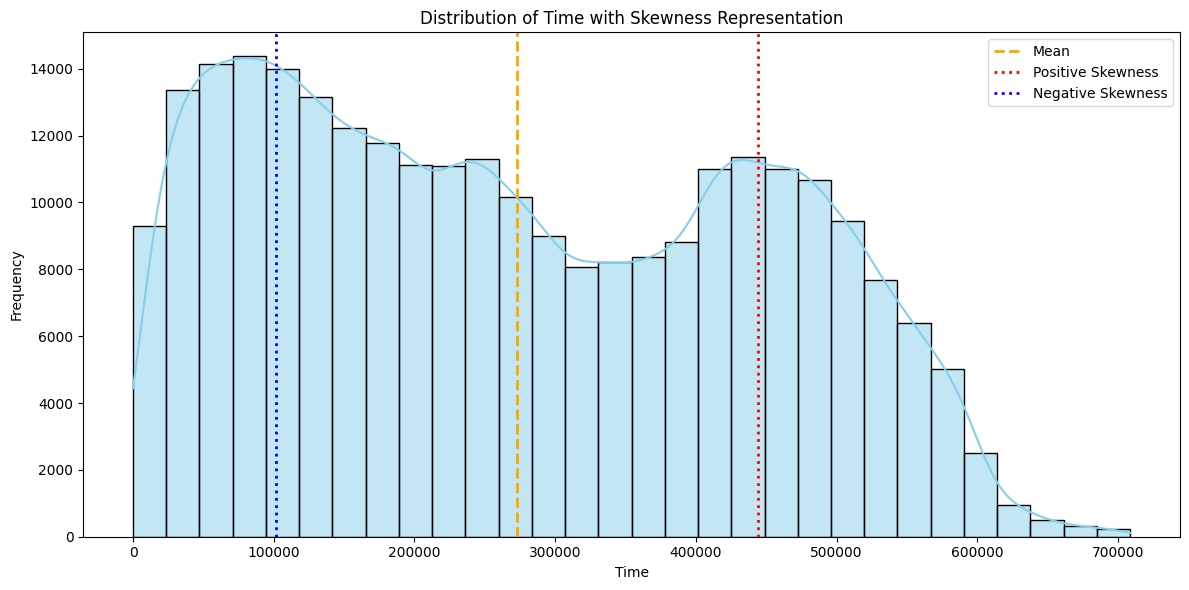

Skewness of Time: 0.2199


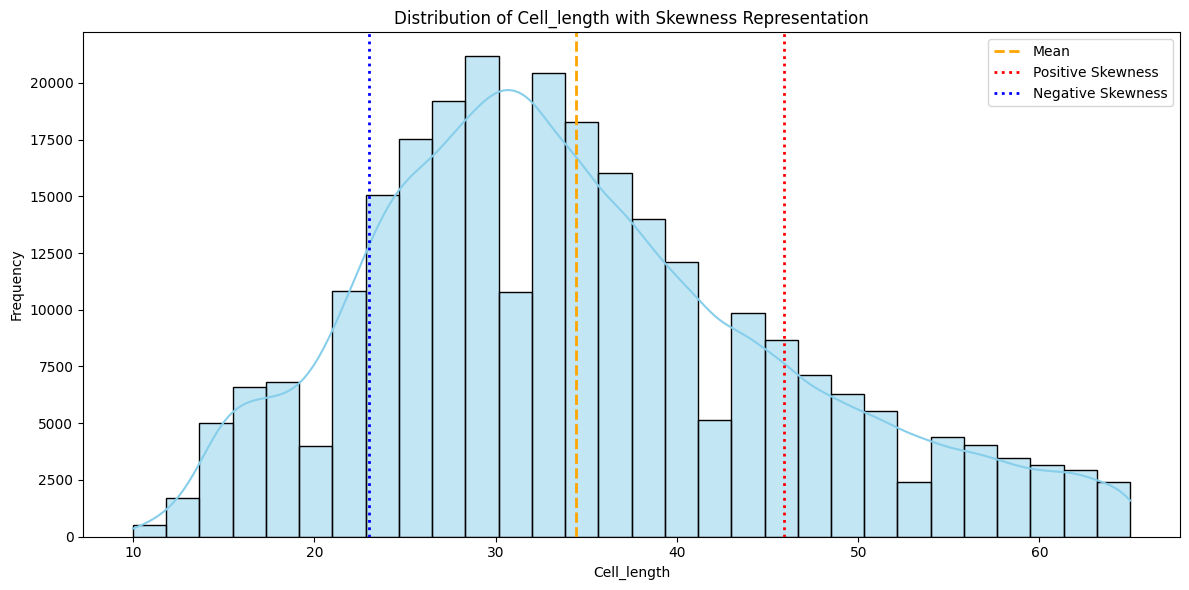

Skewness of Cell_length: 0.5278


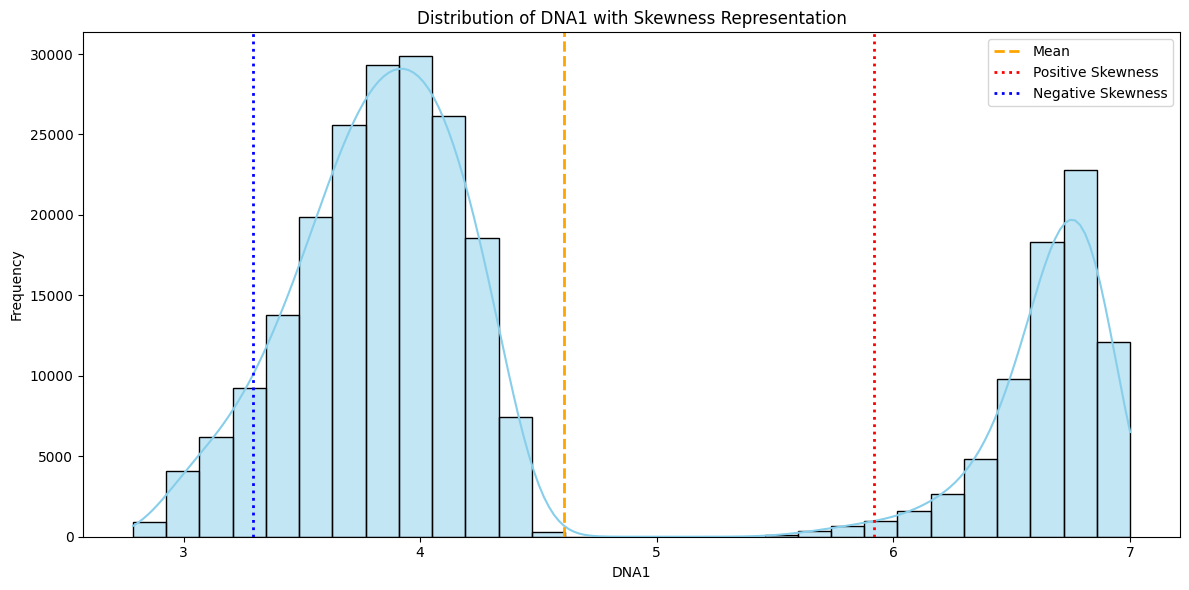

Skewness of DNA1: 0.8450


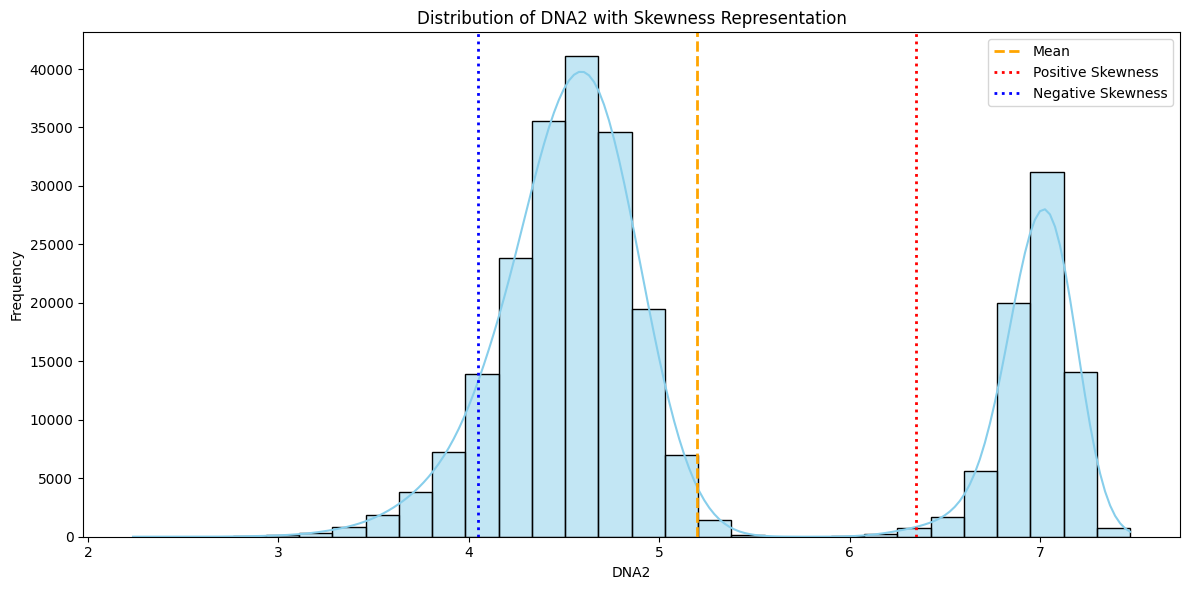

Skewness of DNA2: 0.7792


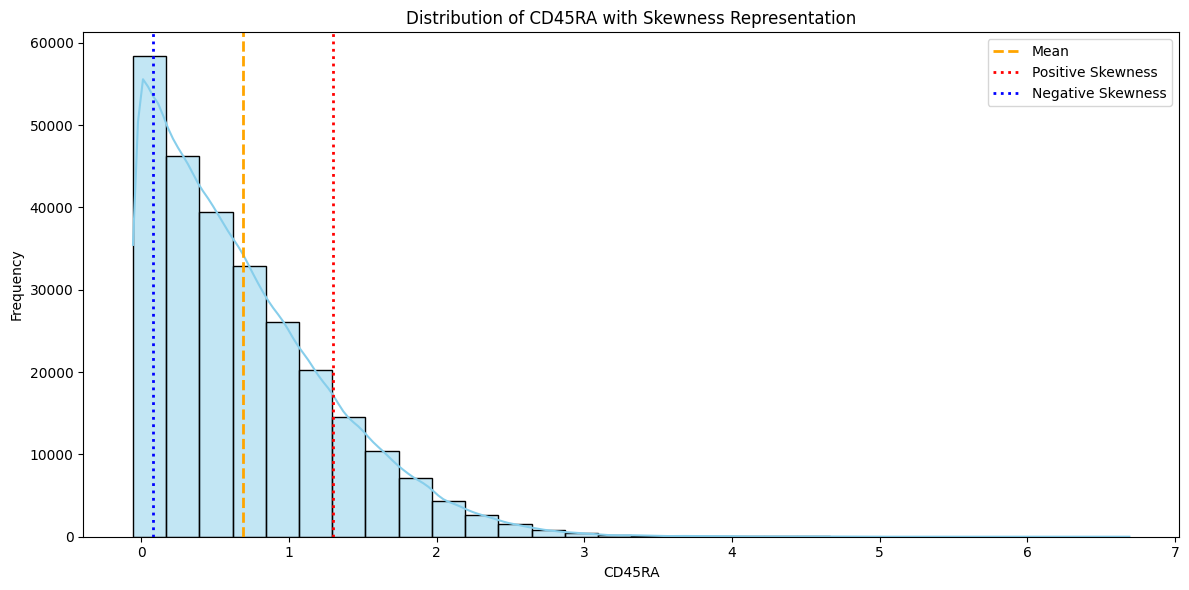

Skewness of CD45RA: 1.1916


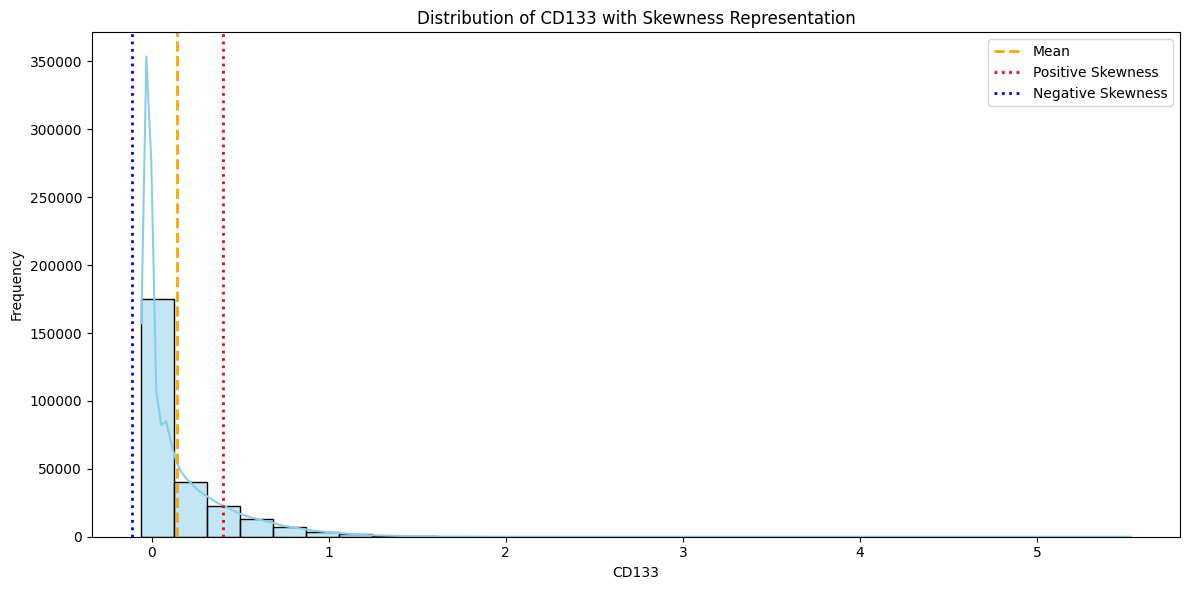

Skewness of CD133: 2.1420


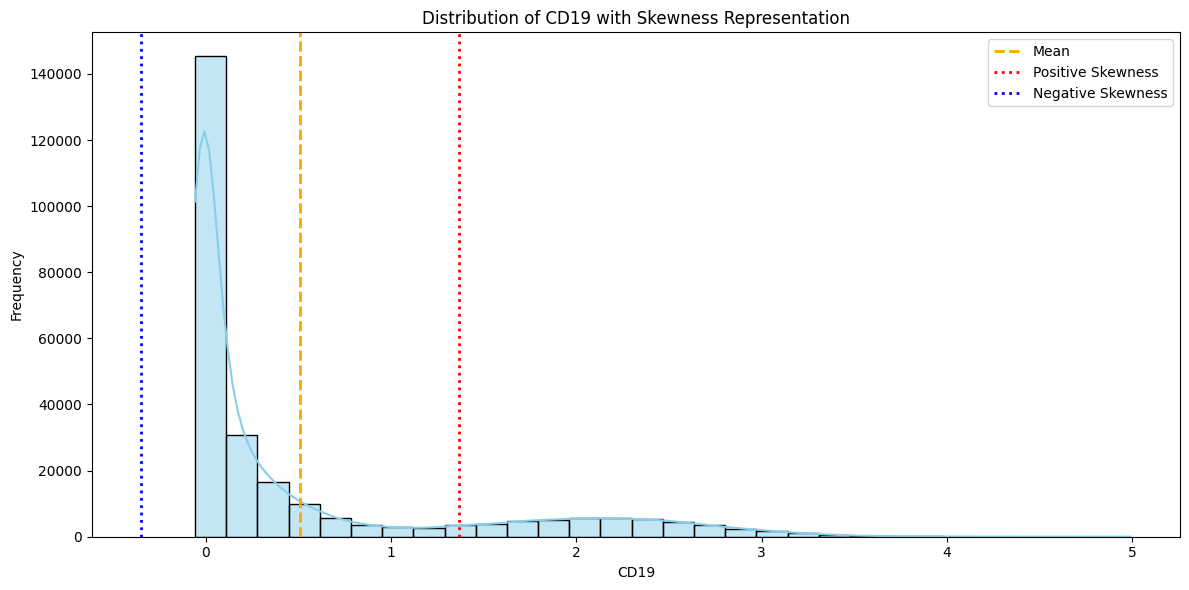

Skewness of CD19: 1.6826


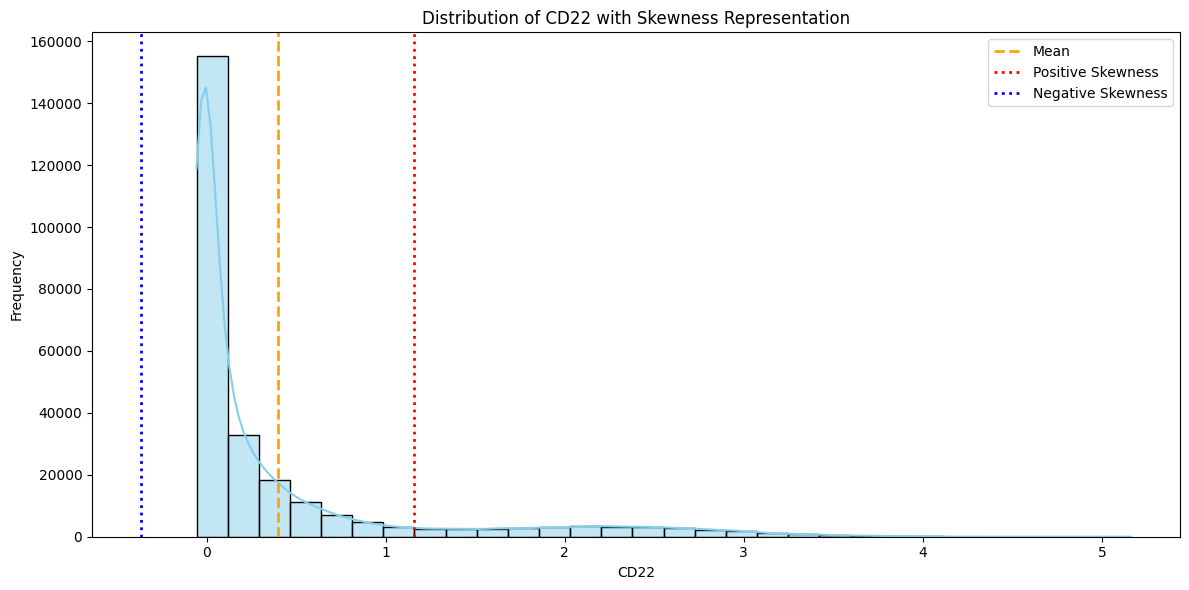

Skewness of CD22: 2.2832


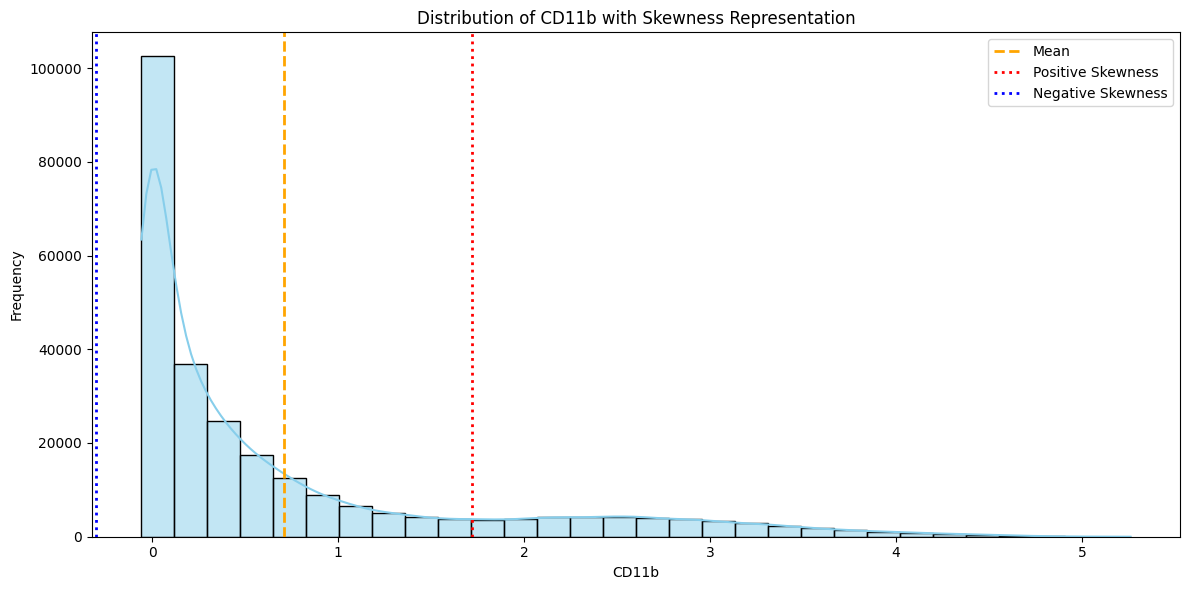

Skewness of CD11b: 1.6791


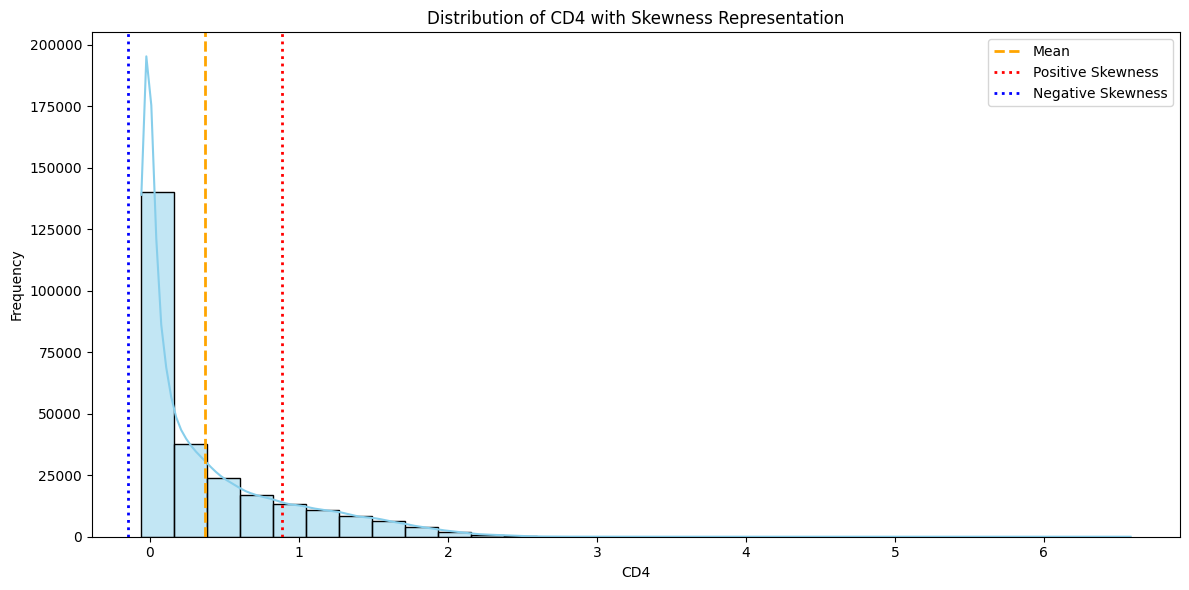

Skewness of CD4: 1.6221


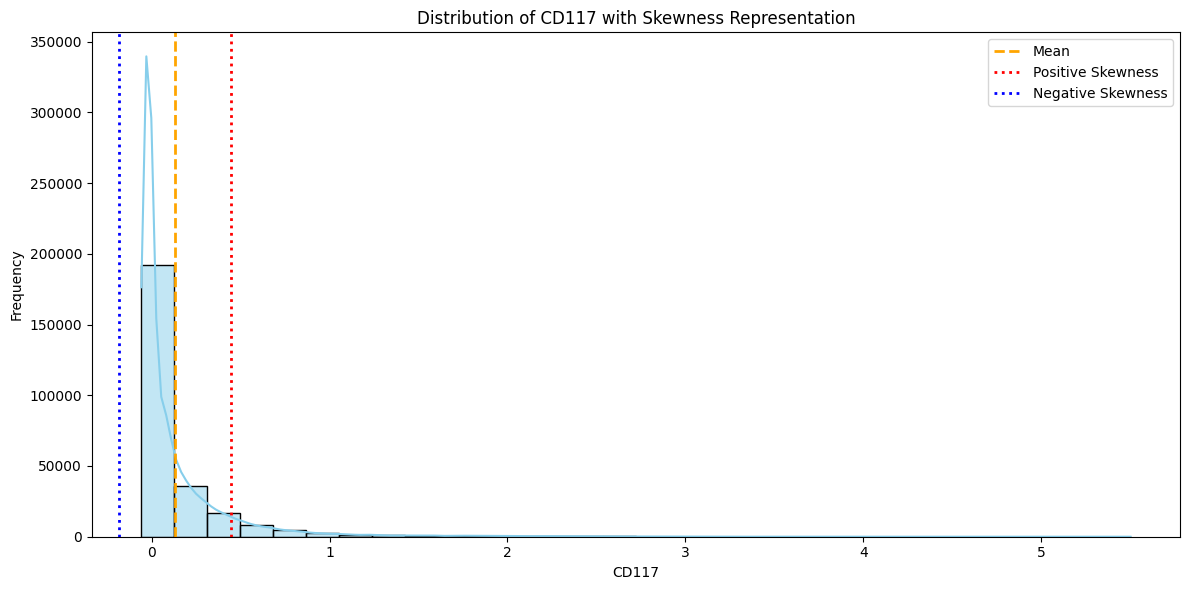

Skewness of CD117: 4.0975


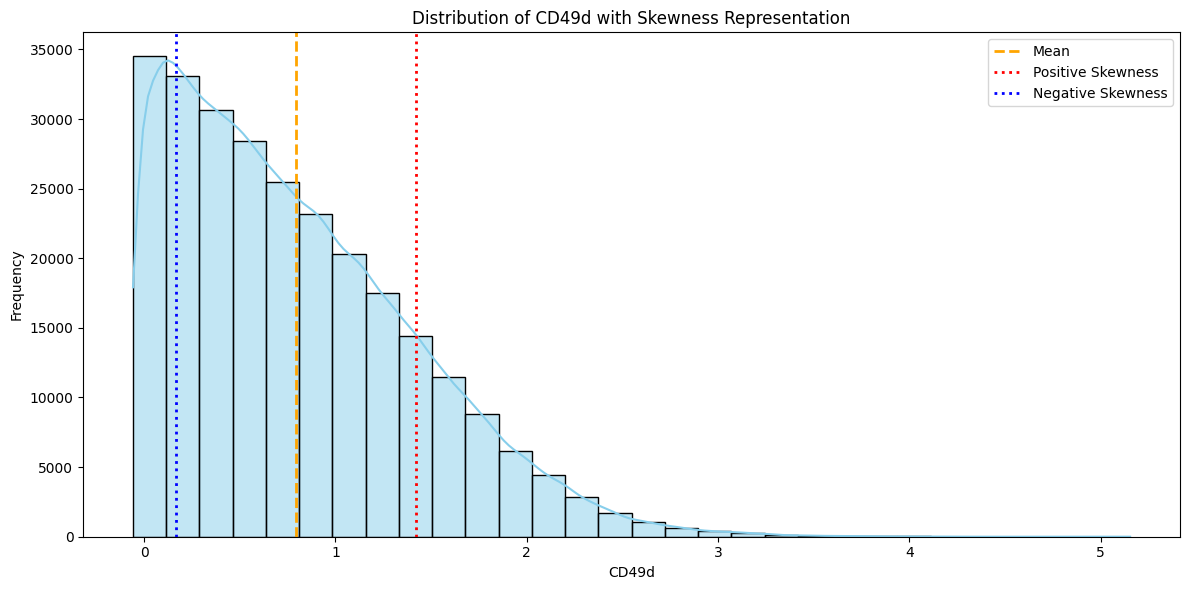

Skewness of CD49d: 0.8568


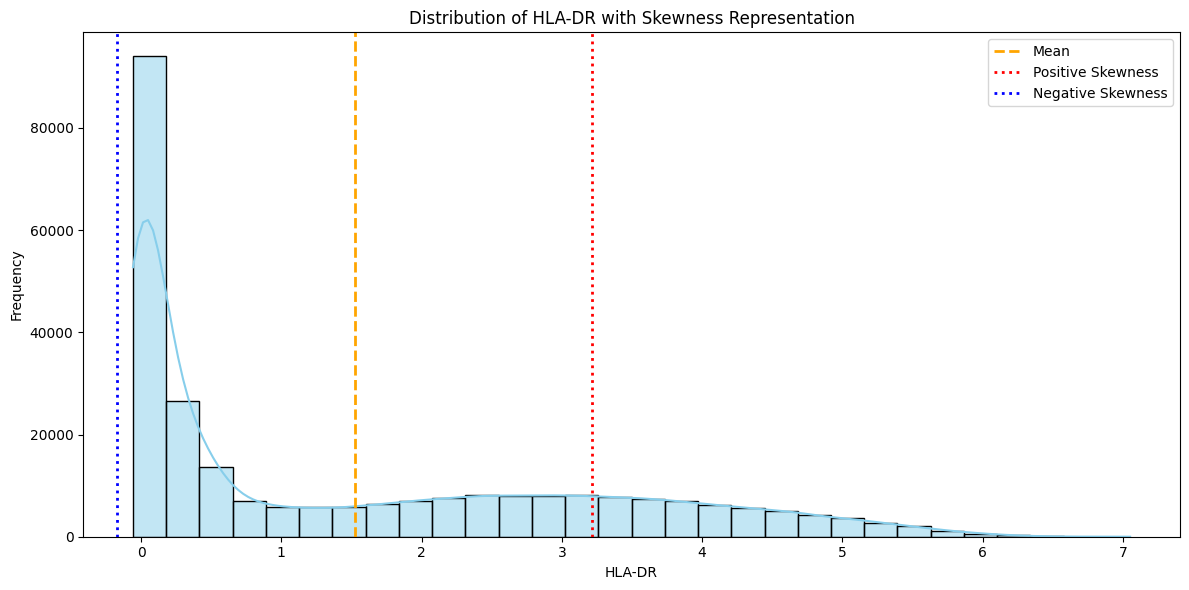

Skewness of HLA-DR: 0.7954


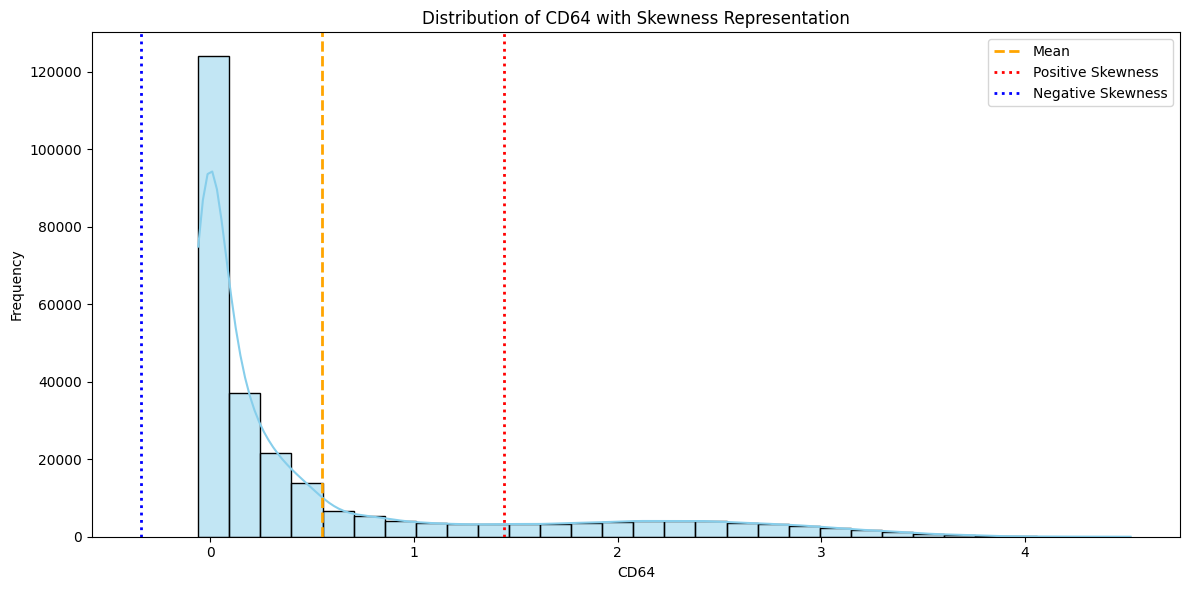

Skewness of CD64: 1.7437


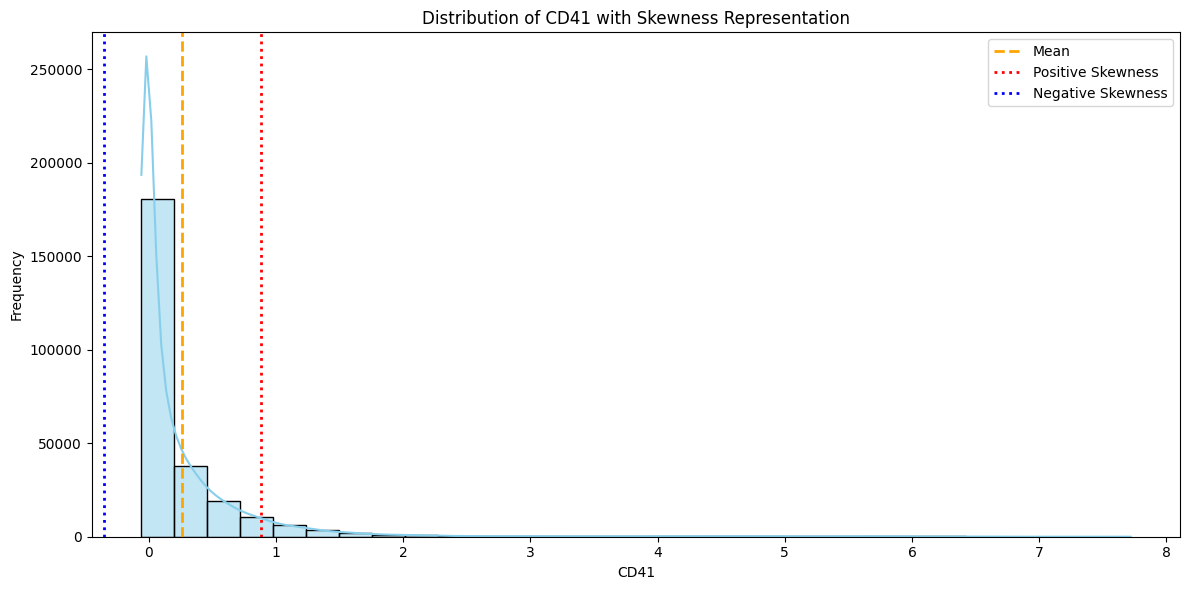

Skewness of CD41: 5.3663


In [ ]:

# List of columns to analyze
columns_to_analyze = [
    'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
    'CD19', 'CD22', 'CD11b', 'CD4', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41'
]

# Create a function to plot skewness
def plot_skewness(column):
    # Calculate skewness for the column
    skewness = df[column].skew()

    # Create a histogram for the column
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')

    # Add vertical line for mean
    plt.axvline(df[column].mean(), color='orange', linestyle='dashed', linewidth=2, label='Mean')

    # Add vertical lines to represent skewness
    if skewness > 0:
        plt.axvline(df[column].mean() + 1 * df[column].std(), color='red', linestyle='dotted', linewidth=2, label='Positive Skewness')
        plt.axvline(df[column].mean() - 1 * df[column].std(), color='blue', linestyle='dotted', linewidth=2, label='Negative Skewness')
    else:
        plt.axvline(df[column].mean() - 1 * df[column].std(), color='red', linestyle='dotted', linewidth=2, label='Negative Skewness')
        plt.axvline(df[column].mean() + 1 * df[column].std(), color='blue', linestyle='dotted', linewidth=2, label='Positive Skewness')

    # Set title and labels
    plt.title(f'Distribution of {column} with Skewness Representation')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show legend
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

    # Print skewness value
    print(f"Skewness of {column}: {skewness:.4f}")

# Loop through the columns and plot skewness for each
for col in columns_to_analyze:
    plot_skewness(col)


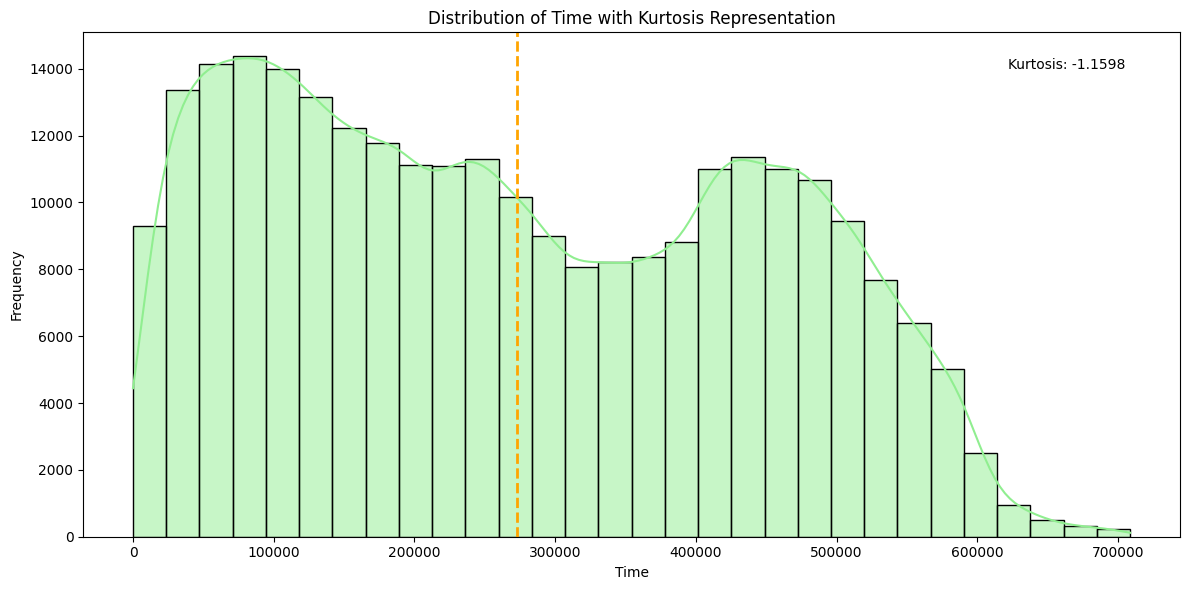

Kurtosis of Time: -1.1598


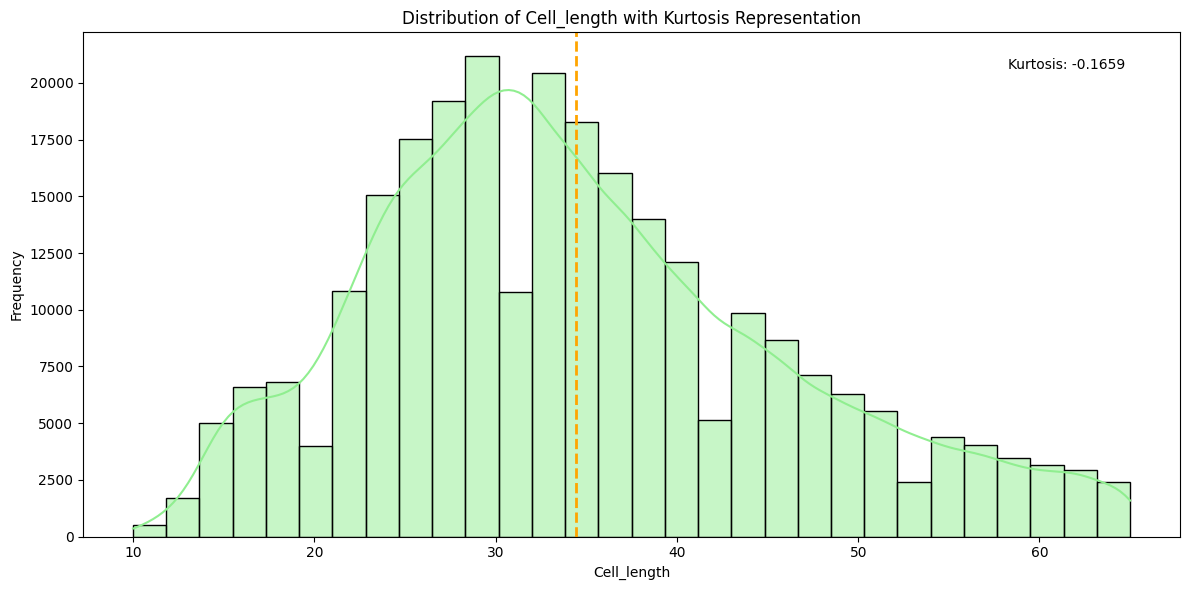

Kurtosis of Cell_length: -0.1659


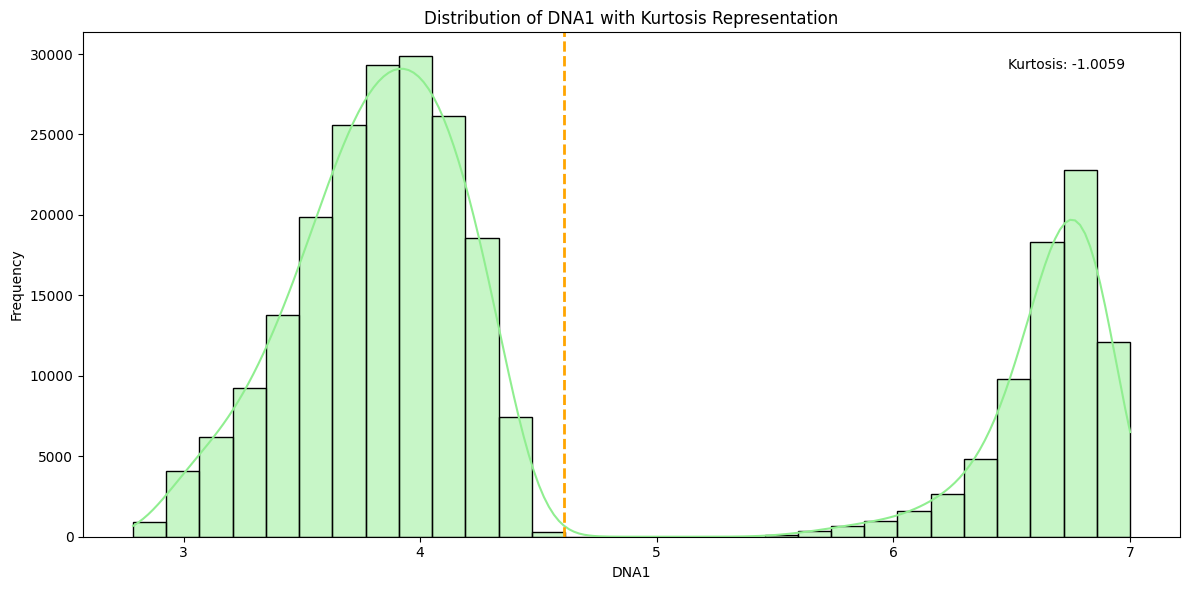

Kurtosis of DNA1: -1.0059


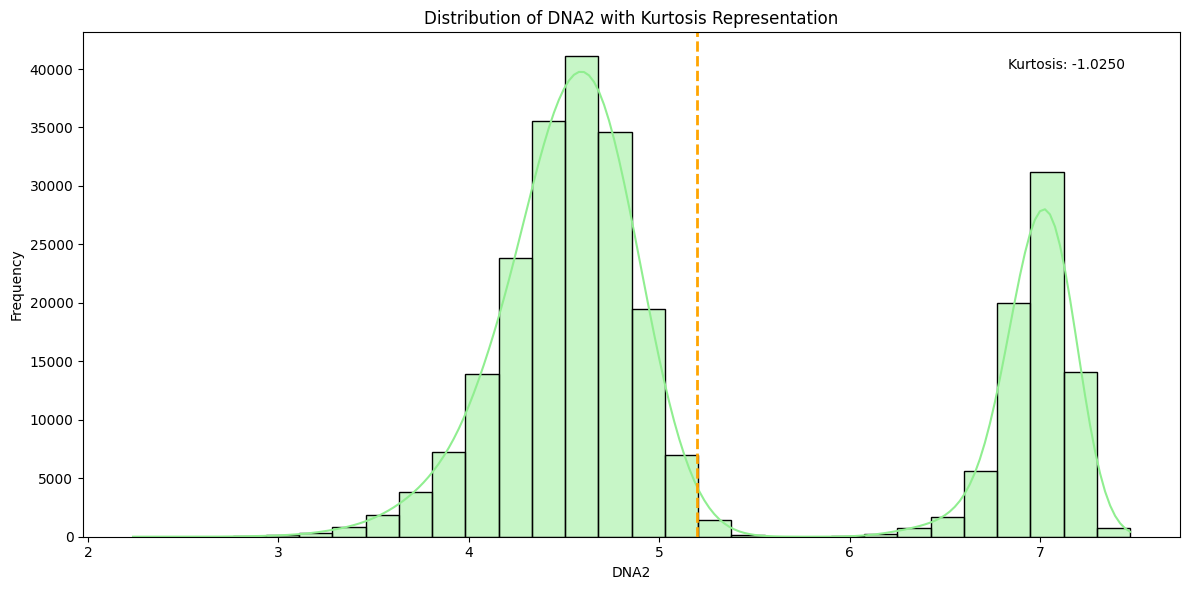

Kurtosis of DNA2: -1.0250


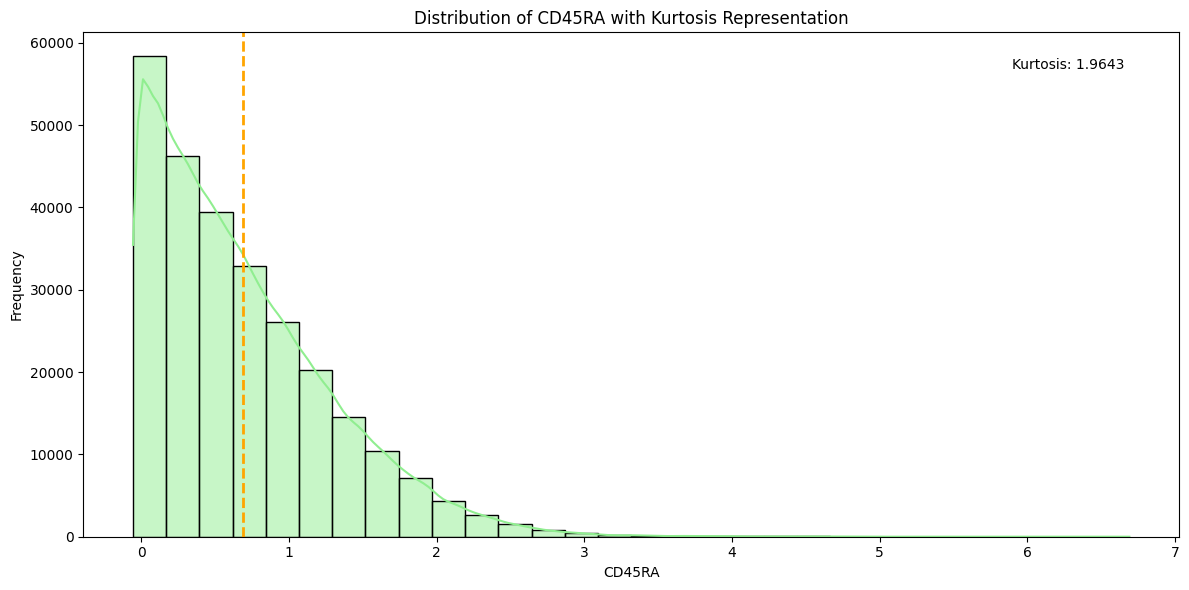

Kurtosis of CD45RA: 1.9643


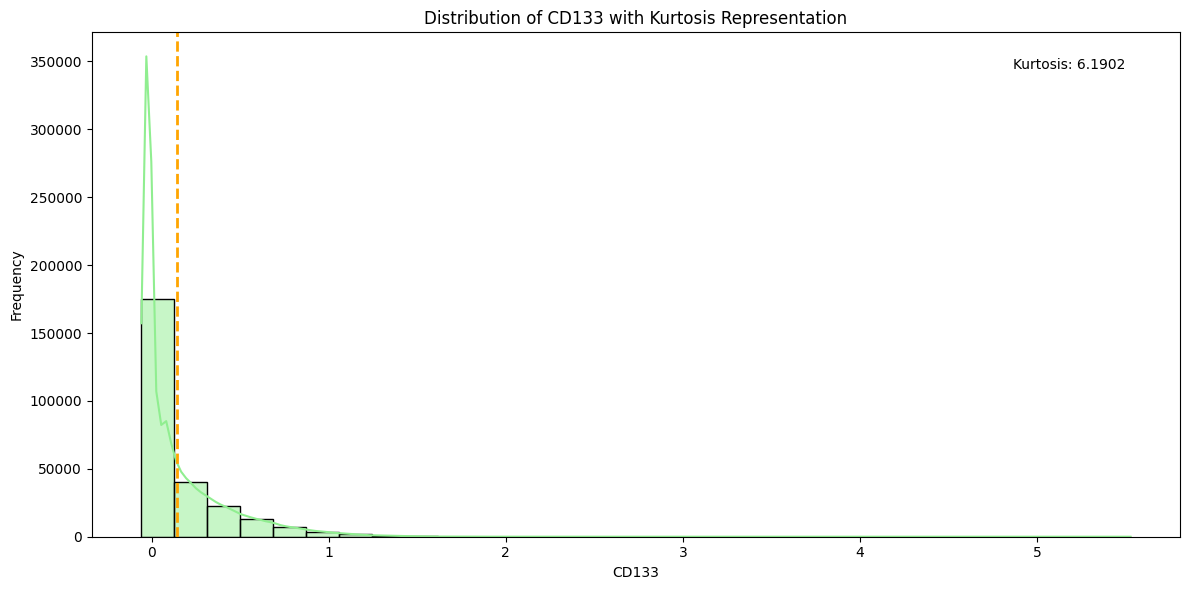

Kurtosis of CD133: 6.1902


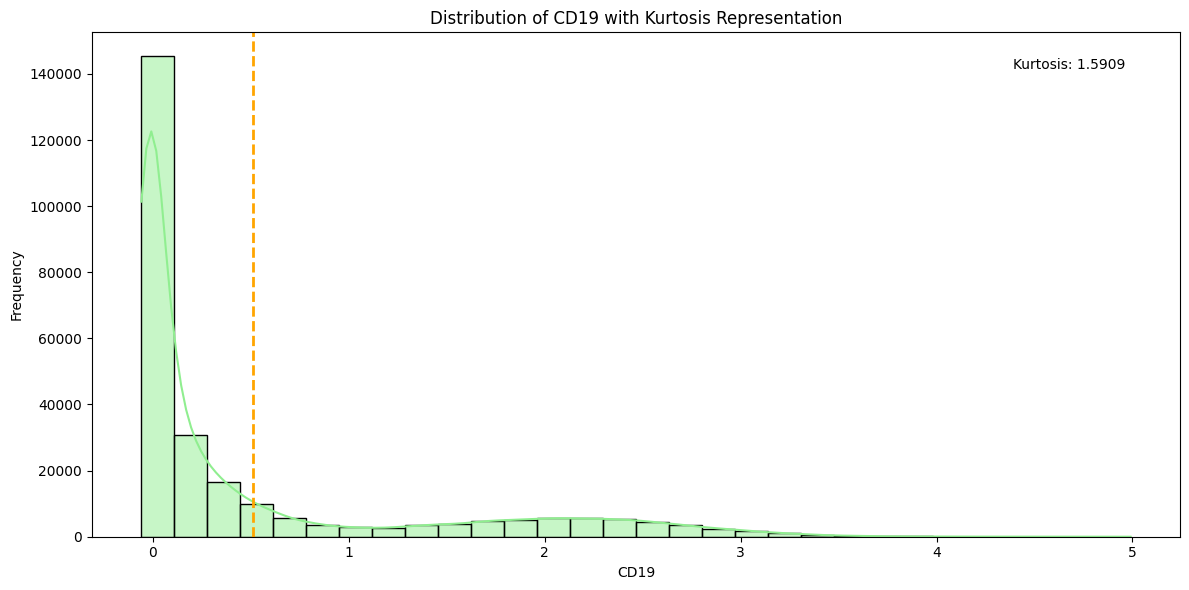

Kurtosis of CD19: 1.5909


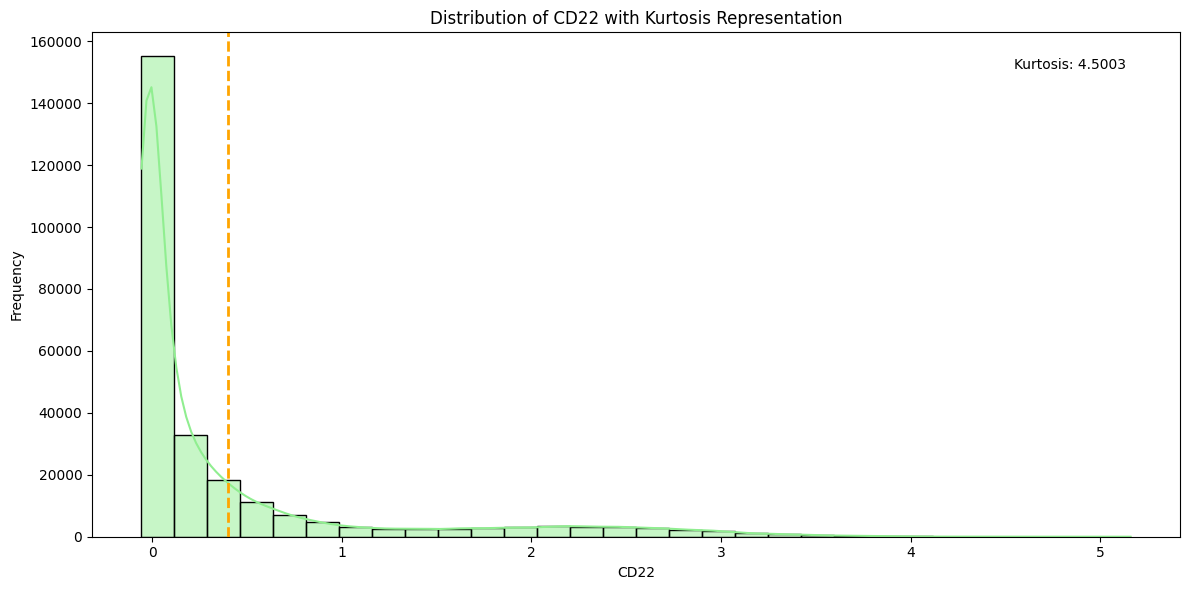

Kurtosis of CD22: 4.5003


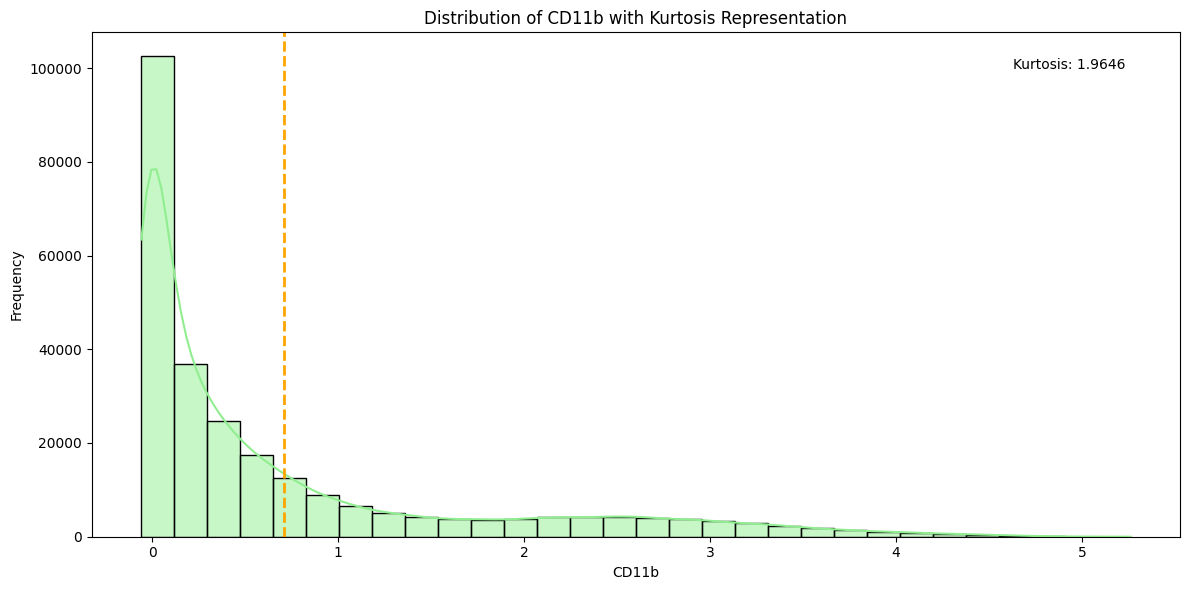

Kurtosis of CD11b: 1.9646


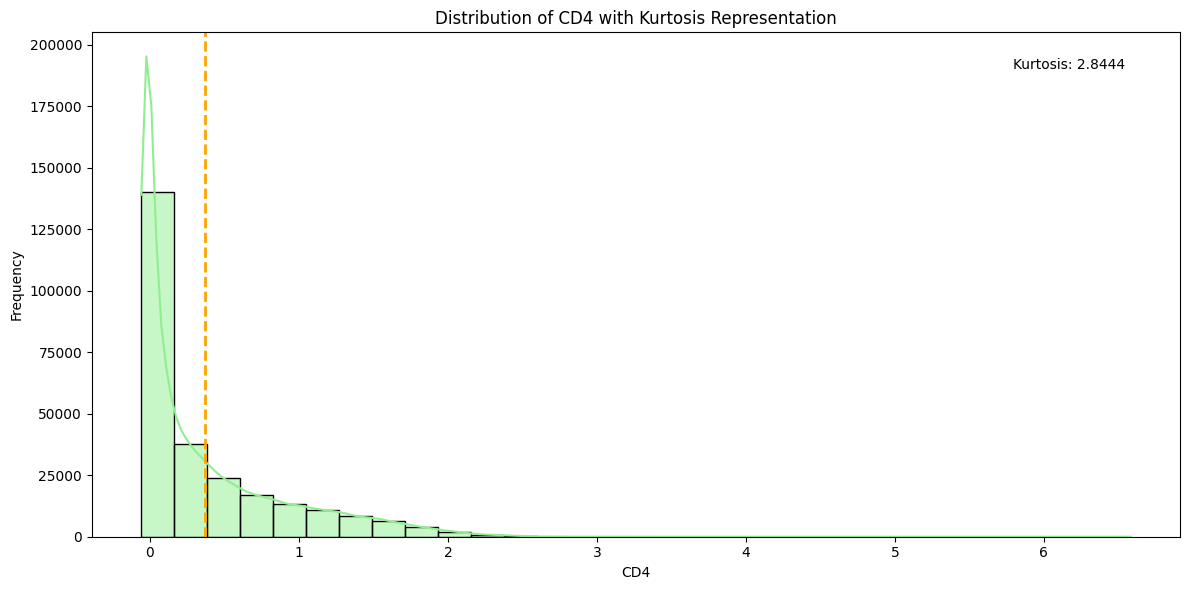

Kurtosis of CD4: 2.8444


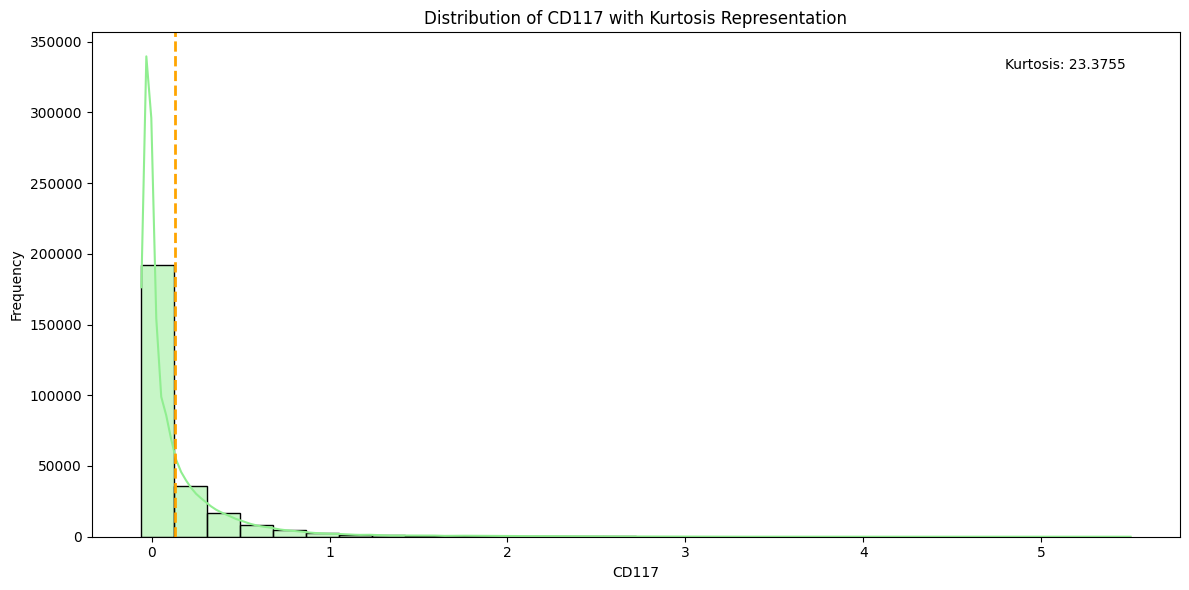

Kurtosis of CD117: 23.3755


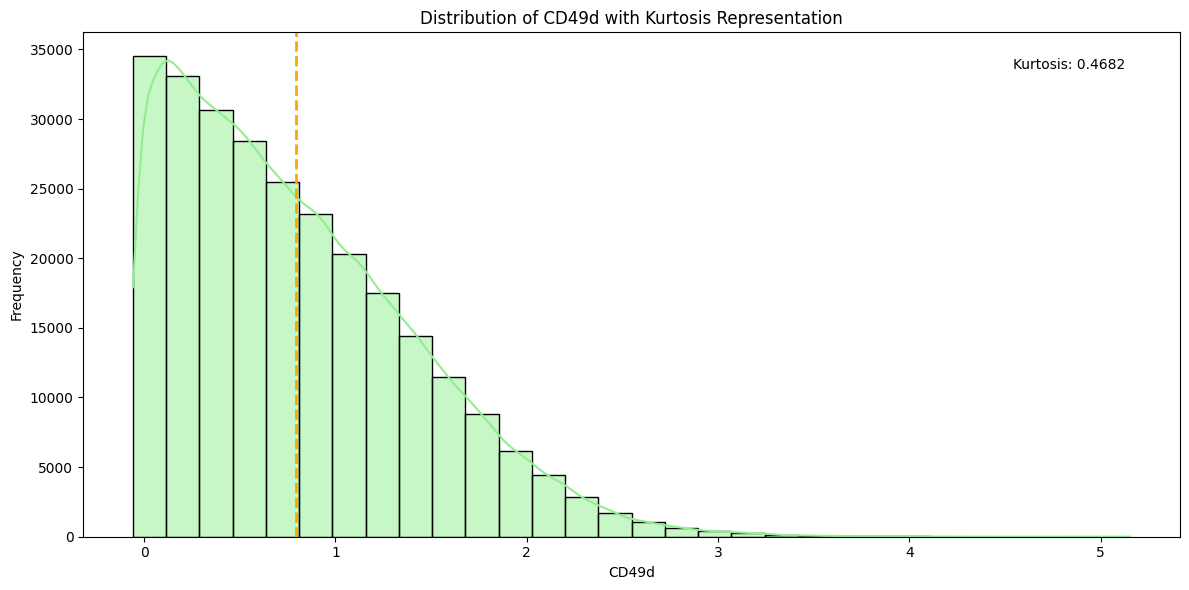

Kurtosis of CD49d: 0.4682


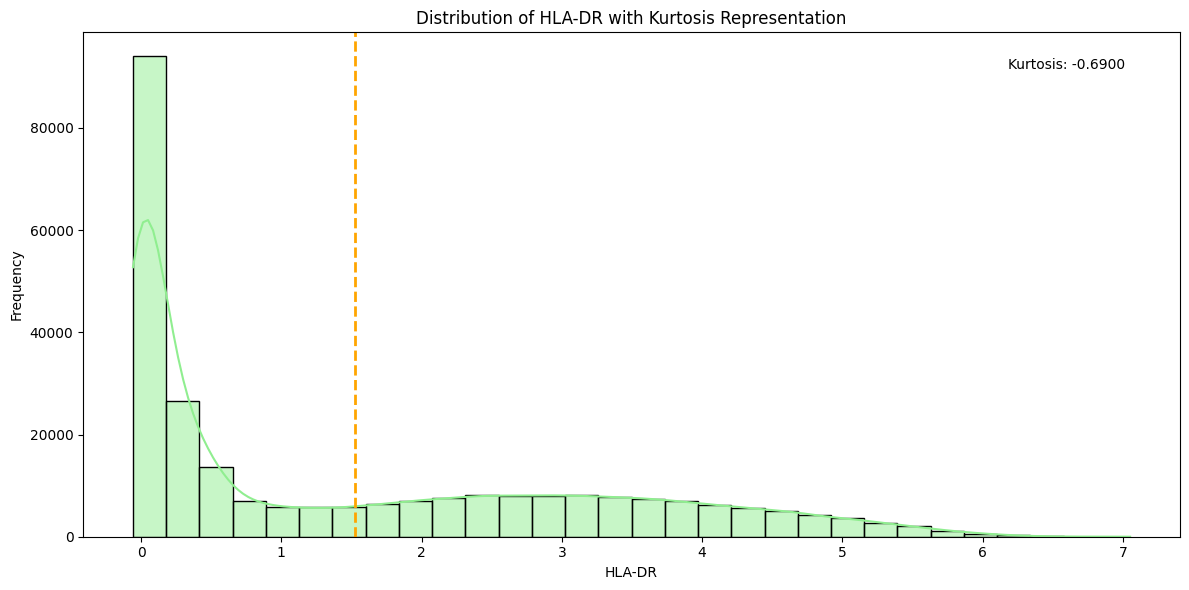

Kurtosis of HLA-DR: -0.6900


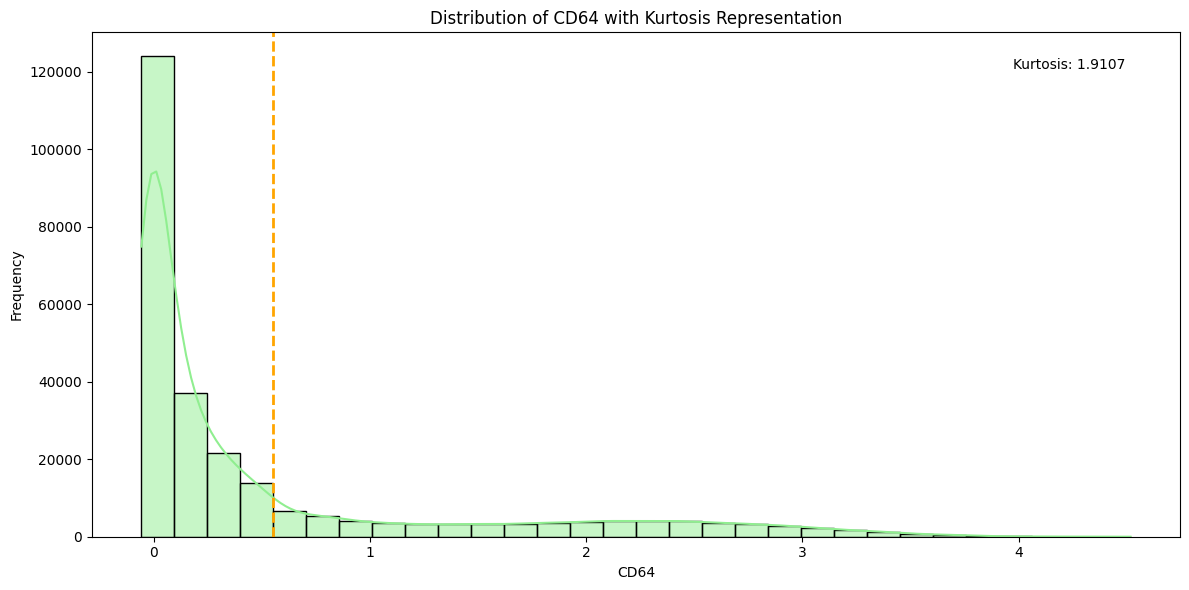

Kurtosis of CD64: 1.9107


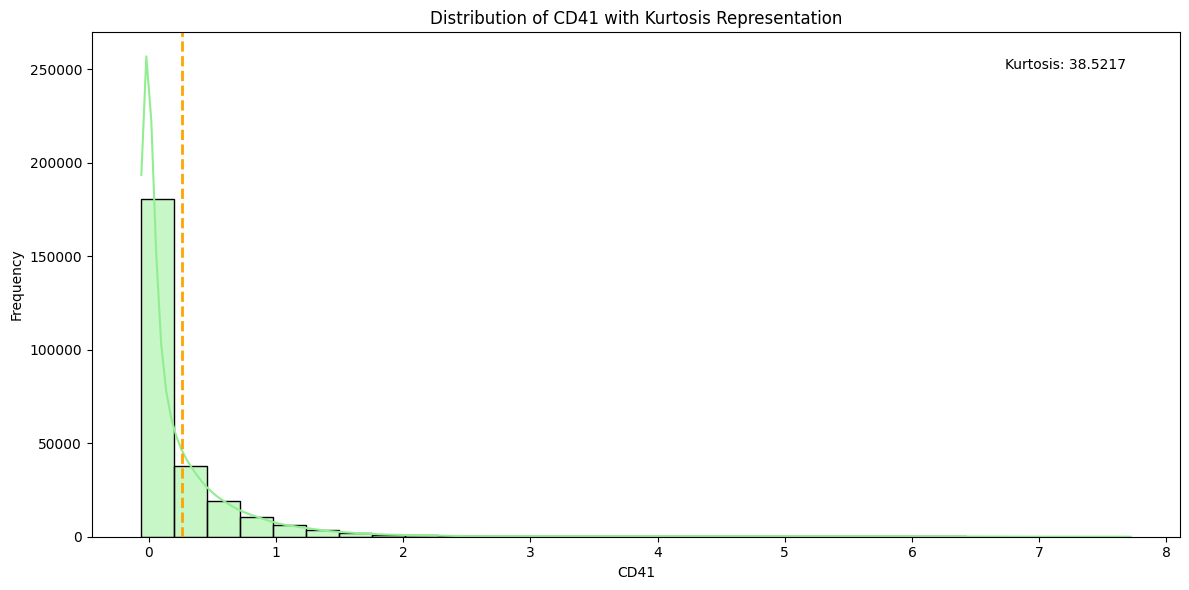

Kurtosis of CD41: 38.5217


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
columns_to_analyze = [
    'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
    'CD19', 'CD22', 'CD11b', 'CD4', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41'
]

# Create a function to plot kurtosis
def plot_kurtosis(column):
    # Calculate kurtosis for the column
    kurtosis = df[column].kurtosis()

    # Create a histogram for the column
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=30, kde=True, color='lightgreen')

    # Add vertical line for mean
    plt.axvline(df[column].mean(), color='orange', linestyle='dashed', linewidth=2, label='Mean')

    # Set title and labels
    plt.title(f'Distribution of {column} with Kurtosis Representation')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show kurtosis value on the plot
    plt.text(0.95, 0.95, f'Kurtosis: {kurtosis:.4f}', horizontalalignment='right',
             verticalalignment='top', transform=plt.gca().transAxes)

    # Show plot
    plt.tight_layout()
    plt.show()

    # Print kurtosis value
    print(f"Kurtosis of {column}: {kurtosis:.4f}")

# Loop through the columns and plot kurtosis for each
for col in columns_to_analyze:
    plot_kurtosis(col)


In [ ]:
# Step 1: Clean the column names by stripping any extra spaces
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv')
data.columns = data.columns.str.strip()

columns_to_remove = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
columns_to_remove = [col for col in columns_to_remove if col in data.columns]
data_cleaned = data.drop(columns=columns_to_remove)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)
print("Standardized Data Shape:", X_scaled.shape)


<ipython-input-23-93a9924b0674>:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv')


Standardized Data Shape: (265626, 35)


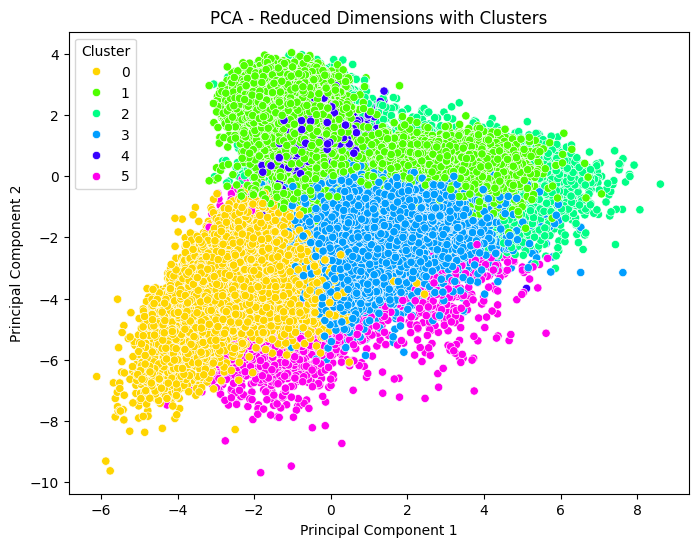

Explained variance ratio: [0.15480196 0.10947208]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
imputer = SimpleImputer(strategy='mean')
data_cleaned_imputed = imputer.fit_transform(data_cleaned)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned_imputed)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
n_clusters = 6  # You can change this based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
custom_palette = sns.color_palette("hsv", n_colors=n_clusters)

# Visualize the PCA result with cluster coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 0], hue=clusters, palette=custom_palette, legend='full')
plt.title('PCA - Reduced Dimensions with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

print('Explained variance ratio:', pca.explained_variance_ratio_)


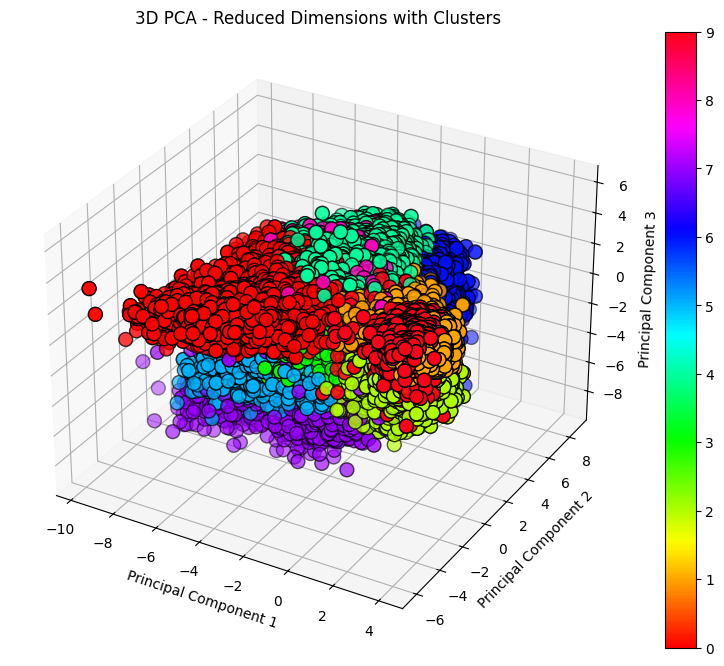

Explained variance ratio: [0.15480196 0.10947208 0.10076616]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

# Impute missing data
imputer = SimpleImputer(strategy='mean')
data_cleaned_imputed = imputer.fit_transform(data_cleaned)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned_imputed)

# Apply PCA to reduce dimensions to 3 for 3D plotting
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Perform KMeans clustering
n_clusters = 10  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Generate a color palette
palette = sns.color_palette("hsv", n_clusters)

# Create 3D plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with the corresponding cluster color
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='hsv', s=100, edgecolor="k")

# Labeling the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar
plt.colorbar(scatter)
plt.title('3D PCA - Reduced Dimensions with Clusters')
plt.show()

print('Explained variance ratio:', pca.explained_variance_ratio_)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming data_cleaned is your preprocessed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Apply PCA
pca = PCA(n_components=4)
pca.fit(X_scaled)

# Calculate Standard deviation (square root of eigenvalues)
std_dev = np.sqrt(pca.explained_variance_)

# Proportion of variance
prop_var = pca.explained_variance_ratio_

# Cumulative proportion
cum_var = np.cumsum(prop_var)

# Create a DataFrame for better visualization
pca_table = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cum_var
}, index=[f'PC{i+1}' for i in range(4)])

# Display the table
print(pca_table)


     Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1            2.327679                0.154802               0.154802
PC2            1.957431                0.109472               0.264274
PC3            1.877985                0.100766               0.365040
PC4            1.606708                0.073757               0.438797


In [ ]:
plt.savefig('tsne_clusters_plot.png')


<Figure size 640x480 with 0 Axes>

<ipython-input-1-2f798f924362>:9: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv')
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 265626 samples in 0.092s...
[t-SNE] Computed neighbors for 265626 samples in 629.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 265626
[t-SNE] Computed conditional probabilities for sample 2000 / 265626
[t-SNE] Computed conditional probabilities for sample 3000 / 265626
[t-SNE] Computed conditional probabilities for sample 4000 / 265626
[t-SNE] Computed conditional probabilities for sample 5000 / 265626
[t-SNE] Computed conditional probabilities for sample 6000 / 265626
[t-SNE] Computed conditional probabilities for sample 7000 / 265626
[t-SNE] Computed conditional probabilities for sample 8000 / 265626
[t-SNE] Computed conditional probabilities for sample 9000 / 265626
[t-SNE] Computed conditional probabilities for sample 10000 / 265626
[t-SNE] Computed conditional probabilities for sample 11000 / 265626
[t-SNE] Computed conditional probabilities for sample 12000 / 265626
[t-SNE] Computed conditional proba

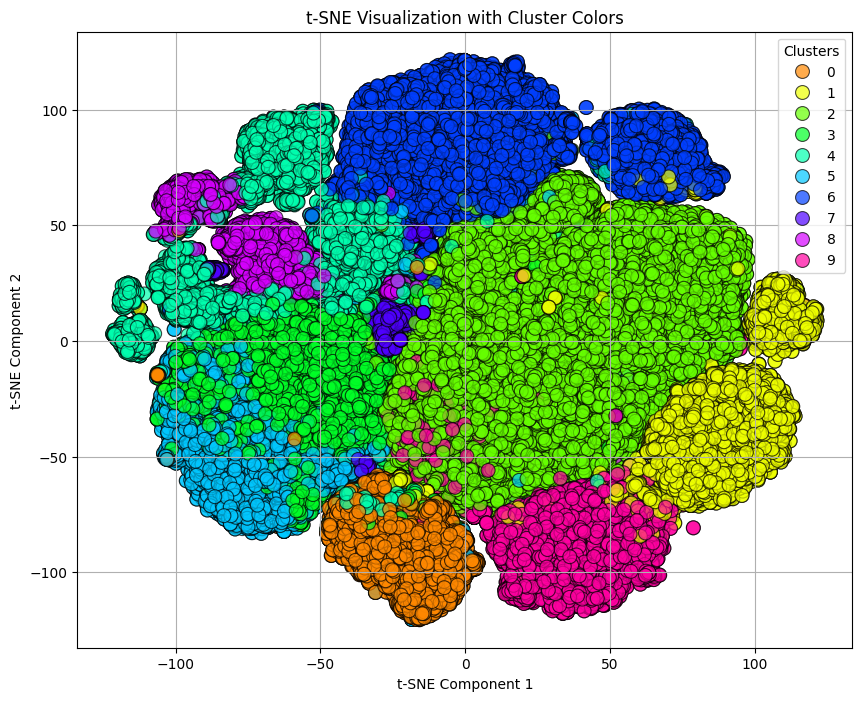

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv')
data.columns = data.columns.str.strip()
columns_to_remove = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
columns_to_remove = [col for col in columns_to_remove if col in data.columns]
data_cleaned = data.drop(columns=columns_to_remove)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Apply KMeans to find clusters
n_clusters = 10  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)

# Create a color palette
palette = sns.color_palette("hsv", n_clusters)

# Plot the t-SNE result with colors
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette=palette, s=100, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('t-SNE Visualization with Cluster Colors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Clusters', loc='best')
plt.grid(True)
plt.show()


# BM

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv'
data=pd.read_csv(path)

<ipython-input-26-931ca20ed92f>:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path)


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Assuming `data` is already a DataFrame
x = pd.DataFrame(data)

# Ensure all columns are numeric; convert non-numeric to NaN
x = x.apply(pd.to_numeric, errors='coerce')

# Drop columns that are entirely non-numeric
x = x.dropna(axis=1, how='all')

# Drop rows with any NaN values (optional, depending on your needs)
x = x.dropna(axis=0, how='any')

# Corruption parameters
p_m = 0.3  # Probability of corruption

# Generate binary mask
m = np.random.binomial(1, 1 - p_m, x.shape)
binary_mask_df = pd.DataFrame(m, columns=x.columns)

# Shuffle the data
x_shuffled = x.apply(lambda col: np.random.permutation(col))

# Apply corruption
x_corrupted_array = x.values * (1 - m) + x_shuffled.values * m
x_corrupted = pd.DataFrame(x_corrupted_array, columns=x.columns)

# Print results
print("\n Original DataFrame (x): \n", x)
print("\n Binary Mask Data Frame (m): \n", binary_mask_df)
print("\n Shuffled Data Frame (x_shuffled): \n", x_shuffled)
print("\n Corrupted Data Frame (x_corrupted): \n", x_corrupted)



 Original DataFrame (x): 
                Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
0         2693.0000            22  4.391057  4.617262  0.162691 -0.029585   
1         3736.0000            35  4.340481  4.816692  0.701348 -0.038280   
2         7015.0000            32  3.838727  4.386369  0.603568 -0.032216   
3         7099.0000            29  4.255805  4.830048  0.433747 -0.027611   
4         7700.0000            25  3.976909  4.506433 -0.008809 -0.030297   
...             ...           ...       ...       ...       ...       ...   
104179  641812.4375            58  6.827981  7.249403 -0.000106 -0.030641   
104180  653387.4375            55  6.683204  7.166172  0.692668 -0.037335   
104181  671024.4375            40  6.911546  7.152603 -0.036795 -0.014477   
104182  680006.4375            48  6.700332  7.100771  0.308817  0.075762   
104183  687494.4375            64  6.559460  7.080928  0.519572  0.097257   

            CD19      CD22     CD11b       CD4 

In [ ]:
import numpy as np
import pandas as pd

# Function to preprocess data and remove specified columns
def preprocess_data_and_remove(df, exclude_columns):
    """
    Preprocesses the DataFrame by removing specified columns and converting the rest to numeric.

    Parameters:
    - df: Input DataFrame.
    - exclude_columns: List of columns to remove from the dataset.

    Returns:
    - Processed DataFrame with specified columns removed and non-numeric columns converted to NaN.
    """
    # Drop specified columns permanently
    df = df.drop(columns=exclude_columns, errors='ignore')

    # Convert remaining columns to numeric, replacing non-numeric values with NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')

    # Drop columns that are entirely NaN (non-numeric after coercion)
    return df_numeric.dropna(axis=1, how='all')

# Function to introduce corruption to the dataset
def introduce_corruption(df, corruption_rate=0.3):
    """
    Corrupts a DataFrame by introducing random noise to a percentage of its elements.

    Parameters:
    - df: Input numeric DataFrame.
    - corruption_rate: Proportion of elements to corrupt.

    Returns:
    - Corrupted DataFrame.
    """
    corrupted_df = df.copy()

    # Determine the number of elements to corrupt
    num_elements = int(corruption_rate * df.size)

    # Randomly select indices to corrupt
    indices = np.random.choice(df.size, num_elements, replace=False)

    # Corrupt the selected indices by adding random noise
    for index in indices:
        # Convert the flat index to a row and column index
        row, col = divmod(index, df.shape[1])

        # Introduce corruption by adding a random value (e.g., between -10 and 10)
        corrupted_df.iat[row, col] += np.random.uniform(-10, 10)

    return corrupted_df


# Create DataFrame
df = pd.DataFrame(data)

# Specify columns to remove
exclude_columns = [' file_number', ' event_number', ' time']

# Preprocess the DataFrame (remove columns and convert remaining to numeric)
df_numeric = preprocess_data_and_remove(df, exclude_columns)

# Generate a corrupted DataFrame from the cleaned data
df_corrupted = introduce_corruption(df_numeric, corruption_rate=0.3)

# Create the binary mask
mask_new = 1 * (df_numeric != df_corrupted)

# Display the original, corrupted, and mask DataFrames
print("Original DataFrame (df_numeric):")
print(df_numeric)
print("\nCorrupted DataFrame (df_corrupted):")
print(df_corrupted)
print("\nBinary Mask (mask_new):")
print(mask_new)


<ipython-input-28-a6b893d21841>:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.1905631625384148' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  corrupted_df.iat[row, col] += np.random.uniform(-10, 10)
<ipython-input-28-a6b893d21841>:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51.78795684583192' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  corrupted_df.iat[row, col] += np.random.uniform(-10, 10)


Original DataFrame (df_numeric):
               Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
0         2693.0000            22  4.391057  4.617262  0.162691 -0.029585   
1         3736.0000            35  4.340481  4.816692  0.701348 -0.038280   
2         7015.0000            32  3.838727  4.386369  0.603568 -0.032216   
3         7099.0000            29  4.255805  4.830048  0.433747 -0.027611   
4         7700.0000            25  3.976909  4.506433 -0.008809 -0.030297   
...             ...           ...       ...       ...       ...       ...   
265621  707917.4375            60  6.733888  7.179924  1.901087 -0.054719   
265622  707951.4375            41  6.826629  7.133022  1.474081 -0.019174   
265623  708145.4375            45  6.787791  7.154027  0.116755 -0.056213   
265624  708398.4375            41  6.889866  7.141219  0.684921 -0.006264   
265625  708585.4375            39  6.865218  7.144353  0.288761 -0.011310   

            CD19      CD22     CD11b      

In [ ]:
labeled_ratio= 0.39
unlabeled_ratio= 0.60

df_labeled=df[df[' label'].notna()]
df_unlabeled=df[df[' label'].isna()]

x_labeled= df_labeled.drop(columns=[' label'])
y_labeled=df_labeled[' label']

x_unlabeled=df_unlabeled.drop(columns=[' label'])
y_unlabeled=df_unlabeled[' label']

print("\n Labeled Features (x_labeled) : \n",x_labeled)
print("\n UnLabeled Features (x_unlabeled) : \n",x_unlabeled)
print("\n Labeled Target (y_labeled) : \n",y_labeled)
print("\n UnLabeled Target (y_unlabeled) : \n",y_unlabeled)


 Labeled Features (x_labeled) : 
                Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
0         2693.0000            22  4.391057  4.617262  0.162691 -0.029585   
1         3736.0000            35  4.340481  4.816692  0.701348 -0.038280   
2         7015.0000            32  3.838727  4.386369  0.603568 -0.032216   
3         7099.0000            29  4.255805  4.830048  0.433747 -0.027611   
4         7700.0000            25  3.976909  4.506433 -0.008809 -0.030297   
...             ...           ...       ...       ...       ...       ...   
265621  707917.4375            60  6.733888  7.179924  1.901087 -0.054719   
265622  707951.4375            41  6.826629  7.133022  1.474081 -0.019174   
265623  708145.4375            45  6.787791  7.154027  0.116755 -0.056213   
265624  708398.4375            41  6.889866  7.141219  0.684921 -0.006264   
265625  708585.4375            39  6.865218  7.144353  0.288761 -0.011310   

            CD19      CD22     CD11b    

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

print("\n Training Features (x_train) : \n", x_train)
print("\n Testing Features (x_test) : \n", x_test)
print("\n Training Target (y_train) : \n", y_train)
print("\n Testing Target (y_test) : \n", y_test)




 Training Features (x_train) : 
                Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
121131   73612.0000            37  3.104567  4.004219  0.200147 -0.037841   
207765  470393.0000            33  3.394722  4.371562  0.400141  0.321116   
72182   567753.0000            29  3.630845  4.471507  0.797058  0.310841   
50911   505487.0000            22  3.221981  4.528588  0.427810 -0.046120   
22336   424718.0000            30  3.959151  4.539984  0.739531 -0.006289   
...             ...           ...       ...       ...       ...       ...   
119879   69026.0000            35  3.896394  4.568209  0.238602 -0.022931   
259178  518638.4375            36  6.594350  6.903137  0.313593 -0.023582   
131932  113944.0000            64  3.943022  4.647186  1.926321  0.094668   
146867  179533.0000            37  3.056461  3.595415  0.289241  0.163690   
121958   76701.0000            43  3.245267  4.109544  1.506159 -0.012223   

            CD19      CD22     CD11b     

### LR/XGB

In [ ]:
from sklearn.linear_model import LogisticRegression

def logistic(x_train, y_train, x_test):
  """Logistic Regression.
  Arg5:
             - x_train, y_train: training dataset
             - X_test: testing feature
  Return:
             - y_test_hat: predicted values for x_test
  """
  #Convert labels into proper format
  #if len(y_train.shape) > 1:
  #y_train = convert_matrix_to_vector(y_train)
  #Define and fit model on training dataset

  model = LogisticRegression()
  model.fit(x_train, y_train)

  #Predict on x_test

  y_test_hat = model.predict_proba(x_test)
  return y_test_hat

In [ ]:
from xgboost import XGBClassifier

def xgboost_model(x_train, y_train, x_test):
    """XGBoost Classifier.
    Args:
        x_train (array-like): Training features.
        y_train (array-like): Training labels.
        x_test (array-like): Testing features.

    Returns:
        y_test_hat (array-like): Predicted probabilities for x_test.
    """
    # Define and fit the model on the training dataset
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)

    # Predict on x_test
    y_test_hat = model.predict_proba(x_test)
    return y_test_hat

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Function to preprocess the dataset
def preprocess_data(x_train, x_test, y_train, y_test):
    # Convert all columns to numeric, coercing errors to NaN
    x_train = x_train.apply(pd.to_numeric, errors='coerce')
    x_test = x_test.apply(pd.to_numeric, errors='coerce')
    y_train = pd.to_numeric(y_train, errors='coerce')
    y_test = pd.to_numeric(y_test, errors='coerce')

    # Concatenate x and y to ensure alignment during cleaning
    train_df = pd.concat([x_train, y_train], axis=1)
    test_df = pd.concat([x_test, y_test], axis=1)

    # Drop rows with NaN values
    train_df = train_df.dropna()
    test_df = test_df.dropna()

    # Split back into features and labels
    x_train_cleaned = train_df.iloc[:, :-1]
    y_train_cleaned = train_df.iloc[:, -1]
    x_test_cleaned = test_df.iloc[:, :-1]
    y_test_cleaned = test_df.iloc[:, -1]

    return x_train_cleaned, x_test_cleaned, y_train_cleaned, y_test_cleaned

# Function for logistic regression and log loss calculation
def logistic_with_loss(x_train, y_train, x_test, y_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    log_reg = LogisticRegression(random_state=42, max_iter=10000)
    log_reg.fit(x_train_scaled, y_train)

    lr_probabilities = log_reg.predict_proba(x_test_scaled)
    loss = log_loss(y_test, lr_probabilities)

    return lr_probabilities, loss

# Load your dataset (example placeholders)
# Replace with your actual train/test splits
# x_train, x_test, y_train, y_test = ...

# Preprocess data
x_train, x_test, y_train, y_test = preprocess_data(x_train, x_test, y_train, y_test)

# Ensure consistent lengths
assert len(x_train) == len(y_train), "x_train and y_train lengths do not match!"
assert len(x_test) == len(y_test), "x_test and y_test lengths do not match!"

# Run logistic regression and calculate log loss
lr_probabilities, loss = logistic_with_loss(x_train, y_train, x_test, y_test)

# Display results
print("Logistic Regression Probabilities:", lr_probabilities)
print("Log Loss:", loss)


Logistic Regression Probabilities: [[4.63217721e-12 9.99999955e-01 2.51440480e-08 ... 1.50965409e-20
  1.77087317e-16 1.34607321e-17]
 [2.71494637e-07 6.32245745e-06 1.93736729e-07 ... 3.35951498e-12
  1.16313464e-10 2.26365427e-11]
 [3.91476073e-15 4.26910200e-10 5.33358978e-17 ... 1.20240683e-02
  9.87948469e-01 2.69850085e-05]
 ...
 [1.61659396e-09 9.71030270e-07 2.76685712e-13 ... 6.09022808e-04
  9.97686940e-01 1.03164940e-05]
 [5.68512465e-11 9.53493638e-08 1.61584007e-10 ... 8.76715592e-17
  1.78208544e-15 5.72652642e-16]
 [1.01550152e-09 1.15016034e-06 6.90952573e-10 ... 3.61214802e-16
  1.33399178e-13 7.30561547e-14]]
Log Loss: 0.011277196298823835


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgboost_with_loss(x_train, y_train, x_test, y_test):
    # Remove NaN values from y_train and y_test
    mask_train = y_train.notna()  # Mask for non-NaN values in y_train
    mask_test = y_test.notna()    # Mask for non-NaN values in y_test

    y_train_cleaned = y_train[mask_train]  # Remove NaN values from y_train
    y_test_cleaned = y_test[mask_test]    # Remove NaN values from y_test

    x_train_cleaned = x_train[mask_train]  # Corresponding x_train values
    x_test_cleaned = x_test[mask_test]    # Corresponding x_test values

    # Adjust y_train and y_test to start from 0 (for XGBoost)
    y_train_adjusted = y_train_cleaned - 1
    y_test_adjusted = y_test_cleaned - 1

    # Initialize and train XGBoost classifier
    xgb_clf = XGBClassifier(eval_metric="logloss", random_state=42)
    xgb_clf.fit(x_train_cleaned, y_train_adjusted)

    # Get class probabilities
    xgb_probabilities = xgb_clf.predict_proba(x_test_cleaned)

    # Calculate log loss
    loss = log_loss(y_test_adjusted, xgb_probabilities)

    return xgb_probabilities, loss

# Call the function
xgb_probabilities, loss = xgboost_with_loss(x_train, y_train, x_test, y_test)

# Print results
print("xGBoost probabilities:", xgb_probabilities)
print("Log loss:", loss)


xGBoost probabilities: [[1.97870395e-06 9.99932766e-01 5.93159848e-06 ... 1.93872324e-06
  2.44556441e-06 1.11664224e-06]
 [4.33844377e-07 3.23731388e-06 3.97891768e-07 ... 4.07531076e-07
  2.35152527e-07 2.33443643e-07]
 [7.24616038e-05 1.04460094e-04 1.02077269e-04 ... 8.42095818e-03
  9.89840686e-01 2.68001459e-04]
 ...
 [2.98635564e-06 3.53656355e-06 3.05137291e-06 ... 6.50469883e-06
  9.99929190e-01 6.71247926e-06]
 [4.13920361e-07 2.44274383e-06 6.53650773e-07 ... 3.60852880e-07
  2.49581035e-07 2.30798534e-07]
 [3.00214623e-07 1.58429145e-06 4.63344577e-07 ... 2.52571340e-07
  3.09681838e-07 1.69419991e-07]]
Log loss: 0.004146936453269598


***Encoder***

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m."""
    return np.random.binomial(1, 1 - p_m, data.shape)
def corruption(mask, data):
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])
    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]
    data_corrupted = data * (1 - mask) + shuffled_data * mask
    mask_new = (data != data_corrupted).astype(int)
    return mask_new, data_corrupted
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape
    # Define model architecture
    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension), activation='relu')(input_layer)
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)
    model = Model(inputs=input_layer, outputs=[output1, output2])
    # Compile model with appropriate loss functions and weights
    model.compile(
        optimizer="rmsprop",
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}  # Corrected to use float
    )
    # Generate corrupted input and mask labels
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)
    x_unlabeled_corrupted,mask_label = corruption(corruption_binary_mask, x_unlabeled)
    assert x_unlabeled_corrupted.shape == mask_label.shape
    # Train model
    model.fit(x_unlabeled_corrupted, {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size)
    # Display model summary (this will print the model's parameters)
    model.summary()
    # Define encoder
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)
    return encoder



from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv'
data = pd.read_csv(path)

# Clean column names
data.columns = data.columns.str.strip()

# Exclude specified columns
exclude_columns = ['Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data = data.drop(columns=[col for col in exclude_columns if col in data.columns])

# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data)  # Now x_unlabeled_scaled is defined

# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


<ipython-input-35-072216b025ea>:54: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - feature_estimation_loss: 0.0570 - loss: 2.1015 - mask_estimation_loss: 2.0445
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -0.0023 - loss: 2.0009 - mask_estimation_loss: 2.0033
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -0.0223 - loss: 1.9804 - mask_estimation_loss: 2.0027
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - feature_estimation_loss: -0.0436 - loss: 1.9589 - mask_estimation_loss: 2.0025
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - feature_estimation_loss: -0.0846 - loss: 1.9151 - mask_estimation_loss: 1.9997
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.1125 - loss: 1.8848 - mask_estimation_loss: 1.9972
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - feature_estimation_loss: -0.2229 - loss: 1.7774 - mask_estimation_loss: 2.0002
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 35)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 35)             │          1,260 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 35)             │          1,260 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 35)             │          1,260 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,562 (29.54 KB)

 Trainable params: 3,780 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,782 (14.78 KB)

In [ ]:
import os
os.makedirs("/content/drive/MyDrive/Colab Notebooks/", exist_ok=True)


In [ ]:
encoder_path = "/content/drive/MyDrive/Colab Notebooks/encoder_model.keras"
encoder.save(encoder_path)


In [ ]:
from keras.models import load_model
encoder = load_model(encoder_path)

In [ ]:
print(data.columns)


Index(['DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4',
       'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123',
       'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44',
       'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64',
       'CD41', 'Viability'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are defined
scaler = StandardScaler()

# Scale the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Ensure these have enough columns before slicing
if x_train_scaled.shape[1] >= 35 and x_test_scaled.shape[1] >= 35:
    # Select only the first 35 columns
    x_train_scaled = x_train_scaled[:, :35]
    x_test_scaled = x_test_scaled[:, :35]
else:
    print("Error: x_train or x_test has fewer than 35 columns.")


In [ ]:
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_train.min()


In [ ]:
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [ ]:
# Ensure x_train_scaled and x_test_scaled have the correct number of features
x_train_scaled = x_train_scaled[:, :encoder.input_shape[1]]
x_test_scaled = x_test_scaled[:, :encoder.input_shape[1]]

# Predict encoded representations
x_trained_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)

# Logistic regression on encoded data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_trained_scaled_encoded, y_train)

y_encoded = log_reg.predict_proba(x_test_scaled_encoded)
print("Logistic Regression Log Loss:", log_loss(y_test, y_encoded))

# XGBoost on encoded data
xgb_clf = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_clf.fit(x_trained_scaled_encoded, y_train_adjusted)

xgb_probabilities = xgb_clf.predict_proba(x_test_scaled_encoded)
print("XGBoost Log Loss:", log_loss(y_test_adjusted, xgb_probabilities))


2285/2285 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
972/972 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Log Loss: 0.8135184601699023
XGBoost Log Loss: 0.9194059545259406


In [ ]:
encoder_path = "/content/drive/MyDrive/Colab Notebooks/encoder_model.keras"
encoder.save(encoder_path)
from keras.models import load_model
encoder = load_model(encoder_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model

In [ ]:
def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):

  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data

    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss

In [ ]:
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Get outputs for labeled data
        y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)



        # Get outputs for unlabeled data
        unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


In [ ]:
x_train = x_train.iloc[:, :35]
x_test = x_test.iloc[:, :35]
x_unlabeled = x_unlabeled.iloc[:, :35]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Define the model with Dropout and L2 regularization
def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu, l2_lambda=0.01):
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, kernel_regularizer=regularizers.l2(l2_lambda), name='model_dense_layer_1')(inputs)
    x = layers.Dropout(0.5)(x)  # Dropout layer to prevent overfitting
    x = layers.Dense(hidden_dimension, activation=activation, kernel_regularizer=regularizers.l2(l2_lambda), name='model_dense_layer_2')(x)
    x = layers.Dropout(0.5)(x)  # Another Dropout layer
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    return tf.keras.Model(inputs=inputs, outputs=[y_logit, y], name="model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data loss
        y_logit, _ = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_logit)

        # Unlabeled data loss
        unlabeled_y_logit, _ = model(unlabeled_feature_batch, training=True)
        _, variance = tf.nn.moments(unlabeled_y_logit, axes=0)
        unlabeled_y_loss = tf.reduce_mean(variance)

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    # Gradient computation and update
    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Ensure NumPy arrays
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.values
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    if isinstance(x_unlabeled, pd.DataFrame):
        x_unlabeled = x_unlabeled.values
    if isinstance(x_test, pd.DataFrame):
        x_test = x_test.values

    # Hyperparameters
    hidden_dimension = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    epochs = parameters['iterations']
    input_dimension = x_train.shape[1]

    # Label preprocessing: One-hot encoding for CategoricalCrossentropy
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    y_train_one_hot = to_categorical(y_train_mapped, num_classes=label_dimension)

    # Data splitting
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]
    splitted_train_x, splitted_train_y = x_train[train_index], y_train_one_hot[train_index]
    splitted_valid_x, splitted_valid_y = x_train[valid_index], y_train_one_hot[valid_index]

    # Load pre-trained encoder
    encoder = load_model(encoder_path)
    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised model
    supervised_model = model(input_dimension=(encoder.output_shape[1],),
                             hidden_dimension=hidden_dimension,
                             label_dimension=label_dimension)

    # Adam optimizer with learning rate scheduler
    initial_learning_rate = 0.001
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                                                               decay_steps=100000,
                                                               decay_rate=0.96,
                                                               staircase=True)
    optimizer = optimizers.Adam(learning_rate=lr_schedule)
    supv_loss_fn = losses.CategoricalCrossentropy(from_logits=True)  # Ensure logits are passed

    # Early stopping parameters
    patience = 20
    best_val_loss = np.inf
    best_weights = None

    # Training loop
    for epoch in range(epochs):
        # Sample labeled data
        batch_index = np.random.choice(splitted_train_x.shape[0], batch_size, replace=False)
        batch_x, batch_y = splitted_train_x[batch_index], splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        # Sample unlabeled data
        batch_unlabeled_index = np.random.choice(x_unlabeled.shape[0], batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        # Create corrupted versions of unlabeled data
        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
            corrupted_data = batch_unlabeled_x * (1 - mask) + np.random.permutation(batch_unlabeled_x) * mask
            corrupted_data_encoded = encoder.predict(corrupted_data)
            batch_unlabeled_x_shuffled.append(corrupted_data_encoded)
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        # Train the model
        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        # Validate
        y_valid_logit, _ = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        # Track best weights manually for early stopping
        if y_valid_loss < best_val_loss:
            best_val_loss = y_valid_loss
            best_weights = supervised_model.get_weights()

        # Early stopping logic
        if epoch > 0 and y_valid_loss > best_val_loss:
            patience -= 1
            if patience == 0:
                print(f"Early stopping triggered at epoch {epoch}")
                break
        else:
            patience = 20  # Reset patience if validation loss improves

        # Display progress every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}')

    # Restore best weights after early stopping
    if best_weights is not None:
        supervised_model.set_weights(best_weights)

    # Final test logit predictions
    y_test_logit, _ = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model

# Hyperparameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {
    'hidden_dim': 100,
    'batch_size': 128,
    'iterations': 1000
}

# Assuming x_train, y_train, x_unlabeled_scaled, x_test are defined
encoder_path = "/content/drive/MyDrive/Colab Notebooks/encoder_model.keras"  # Replace with your encoder path
y_test, model_instance = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test,
                                         parameters, mask_probability, K, beta, encoder_path)


229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch: 0/1000, Validation Loss: 668311.5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [63]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.preprocessing import StandardScaler


# Define the model
def custom_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = Input(shape=(input_dimension,), name="model_input")
    x = Dense(hidden_dimension, activation=activation, name="dense_1")(inputs)
    x = Dense(hidden_dimension, activation=activation, name="dense_2")(x)
    y_logit = Dense(label_dimension, activation=None, name="logits")(x)
    y = Activation("softmax", name="softmax_output")(y_logit)
    return Model(inputs=inputs, outputs=[y_logit, y], name="custom_model")


# Training function
def train(feature_batch, label_batch, unlabeled_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled loss
        y_logit, y_pred = model(feature_batch, training=True)
        labeled_loss = supv_loss_fn(label_batch, y_pred)

        # Unlabeled loss (consistency regularization)
        unlabeled_y_logit, unlabeled_y_pred = model(unlabeled_batch, training=True)
        consistency_loss = tf.reduce_mean((unlabeled_y_pred - tf.stop_gradient(unlabeled_y_pred)) ** 2)

        # Total loss
        total_loss = labeled_loss + beta * consistency_loss

    # Backpropagation
    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


# Semi-supervised training function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Standardize the data
    scaler = StandardScaler()
    x_train, x_unlabeled, x_test = map(scaler.fit_transform, [x_train, x_unlabeled, x_test])

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # One-hot encode labels
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    y_train_encoded = tf.keras.utils.to_categorical([np.where(unique_classes == label)[0][0] for label in y_train])

    # Split train-validation
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]
    x_train_split, y_train_split = x_train[train_idx], y_train_encoded[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train_encoded[valid_idx]

    # Load the encoder and encode inputs
    encoder = load_model(encoder_path)
    x_train_encoded = encoder.predict(x_train_split)
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)
    x_unlabeled_encoded = encoder.predict(x_unlabeled)

    # Initialize the model
    model = custom_model(encoder.output_shape[1], hidden_dimension, label_dimension)

    # Optimizer and loss function
    initial_lr = 0.01
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=500, decay_rate=0.9, staircase=True)
    optimizer = Adam(learning_rate=lr_schedule)
    supv_loss_fn = CategoricalCrossentropy(from_logits=False)

    # Training loop
    for epoch in range(epochs):
        # Sample labeled data
        labeled_idx = np.random.choice(len(x_train_encoded), batch_size, replace=False)
        batch_x, batch_y = x_train_encoded[labeled_idx], y_train_split[labeled_idx]

        # Sample and corrupt unlabeled data
        unlabeled_idx = np.random.choice(len(x_unlabeled_encoded), batch_size, replace=False)
        batch_unlabeled = x_unlabeled_encoded[unlabeled_idx]
        corrupted_batches = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled.shape)
            corrupted = batch_unlabeled * (1 - mask) + np.random.permutation(batch_unlabeled) * mask
            corrupted_batches.append(corrupted)
        batch_unlabeled_corrupted = np.concatenate(corrupted_batches, axis=0)

        # Train step
        beta_scaled = beta * (epoch / epochs)  # Gradual increase in unsupervised loss weight
        total_loss = train(batch_x, batch_y, batch_unlabeled_corrupted, model, beta_scaled, supv_loss_fn, optimizer)

        # Validation loss
        if epoch % 100 == 0:
            _, y_valid_pred = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_pred)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}, Total Loss: {total_loss:.4f}")

    # Final test predictions
    _, y_test_pred = model(x_test_encoded, training=False)
    return y_test_pred, model


# Example usage
parameters = {"hidden_dimension": 100, "batch_size": 128, "epochs": 1000}
mask_probability = 0.3
K = 3
beta = 1.0

y_test_pred, trained_model = semi_supervised(
    x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path="/content/drive/MyDrive/Colab Notebooks/encoder_model.keras"
)


2056/2056 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
972/972 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
8301/8301 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
Epoch 0/1000, Validation Loss: 19.5677, Total Loss: 24.9795
Epoch 100/1000, Validation Loss: 1.5581, Total Loss: 1.5976
Epoch 200/1000, Validation Loss: 1.5999, Total Loss: 1.4991
Epoch 300/1000, Validation Loss: 1.6086, Total Loss: 1.4002
Epoch 400/1000, Validation Loss: 1.6540, Total Loss: 1.4454
Epoch 500/1000, Validation Loss: 1.2392, Total Loss: 1.1010
Epoch 600/1000, Validation Loss: 1.1741, Total Loss: 1.2664
Epoch 700/1000, Validation Loss: 1.3389, Total Loss: 1.4812
Epoch 800/1000, Validation Loss: 1.3934, Total Loss: 1.0963
Epoch 900/1000, Validation Loss: 1.1472, Total Loss: 1.2018


In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def perf_metric(metric, y_test, y_test_hat):
    """
    Evaluate the performance of a classification model using accuracy or AUROC.

    Parameters:
    - metric (str): 'acc' for accuracy or 'auc' for AUROC.
    - y_test (np.array): Ground truth labels, integer encoded, shape: (n_samples,).
    - y_test_hat (np.array): Predicted probabilities, shape: (n_samples, n_classes).

    Returns:
    - float: Calculated performance metric.
    """
    # Validate input
    if metric not in ['acc', 'auc']:
        raise ValueError("Unsupported metric. Use 'acc' for accuracy or 'auc' for AUROC.")

    # Accuracy metric
    if metric == 'acc':
        # Convert predicted probabilities to class labels
        y_pred = np.argmax(y_test_hat, axis=1)
        return accuracy_score(y_test, y_pred)

    # AUROC metric
    elif metric == 'auc':
        n_classes = y_test_hat.shape[1]
        if n_classes == 2:  # Binary classification
            # Use probabilities of the positive class
            y_pred_prob = y_test_hat[:, 1]
            return roc_auc_score(y_test, y_pred_prob)
        elif n_classes > 2:  # Multiclass classification
            # Use one-vs-rest approach
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            return roc_auc_score(y_test_bin, y_test_hat, average='macro', multi_class='ovr')
        else:
            raise ValueError("AUROC is not defined for single-class tasks.")

In [65]:
# Evaluate Accuracy
accuracy = perf_metric('acc', y_test, y_test_model)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate AUROC
auroc = perf_metric('auc', y_test, y_test_model)
print(f"AUROC: {auroc:.4f}")

NameError: name 'y_test_model' is not defined

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model




In [ ]:
def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):

  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data

    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss



In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Get outputs for labeled data
        y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)



        # Get outputs for unlabeled data
        unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


In [ ]:
# Define corruption function (applies mask to data)
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, optimizers
from tensorflow.keras.losses import CategoricalCrossentropy

# Semi-supervised learning function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Ensure inputs are NumPy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_unlabeled = np.array(x_unlabeled)
    x_test = np.array(x_test)

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]
    input_dimension = x_train.shape[1]

    if y_train.ndim == 1:
        label_dimension = 1
    else:
        label_dimension = y_train.shape[1]

    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None
        y_train_mapped = y_train

    # Train-validation split
    indices = np.random.permutation(x_train.shape[0])
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train_mapped[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train_mapped[valid_idx]

    # Data encoding (Assume `encoder_path` is pre-defined)
    encoder = load_model(encoder_path)
    '''
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the model (rename to avoid conflict)
    model_instance = model(
        input_dimension=(encoder.output_shape[1],),
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension,
    )

    optimizer = Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    '''
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

# Initialize the model
# Define model parameters
    input_dimension = encoder.output_shape[1]  # Dimension of encoded input
    hidden_dimension = 64                      # Example hidden layer dimension
    label_dimension = 10                       # Number of classes in your data

# Define the model architecture
    inputs = tf.keras.Input(shape=(input_dimension,))
    hidden_layer = tf.keras.layers.Dense(hidden_dimension, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(label_dimension, activation='softmax')(hidden_layer)
    model = Model(inputs=inputs, outputs=outputs)

# Compile the model
    optimizer = optimizers.Adam()
    #supv_loss_fn = CategoricalCrossentropy(from_logits=True)
    supv_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    model.compile(optimizer=optimizer, loss=supv_loss_fn, metrics=['accuracy'])

    # Training loop
    for epoch in range(epochs):
        batch_idx = np.random.choice(len(x_train_split), batch_size, replace=False)
        batch_x = x_train_split[batch_idx]
        batch_y = y_train_split[batch_idx]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_idx = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_idx]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
            _, corrupted_data = corruption(mask, batch_unlabeled_x)
            batch_unlabeled_x_shuffled.append(encoder.predict(corrupted_data))

        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)
        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, model, beta, supv_loss_fn, optimizer)

        if epoch % 100 == 0:
            y_valid_logit, _ = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_logit)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}")

    y_test_logit, _ = model(x_test_encoded, training=False)
    return y_test_logit, model


mask_probability = 0.3
alpha = 2.0
K = 3
beta = 1.0
parameters = {
    'hidden_dimension': 100,
    'batch_size': 128,
    'epochs': 600  # Use 'iterations' consistently
}

# Call the semi_supervised function (example)
y_test_logit, model = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path="/content/drive/MyDrive/Colab Notebooks/encoder_model.keras")


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 35), found shape=(32, 40)

In [ ]:
import pandas as pd

# Load training data from CSV
x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv')  # Replace with your file path


<ipython-input-11-f91cc503f7de>:4: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Levine_32dim (1).csv')  # Replace with your file path


In [ ]:
print(x_train.shape)


(265626, 41)
